In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data=pd.read_excel("All_Schemes_Data_Broken_Into_Mom_And_Baby.xlsx", sheet_name="Mom_Data",index_col=[0,1])

In [4]:
data

Scheme_Code  Plan_Key  Authorization_Key  Stg_Has_Key  \
         admit_year                                                         
Scheme A 2013               BON      20.0        769500425.0    426069354   
         2013               BON      20.0        769252214.0    425810854   
         2013               BON      20.0        770333964.0    426326697   
         2013               BON      20.0        769012710.0    337573074   
         2013               BON      20.0        769170413.0    337573090   
...                         ...       ...                ...          ...   
Scheme_C 2019                 C     731.0        912810835.0    687097784   
         2020                 C     731.0        913064135.0    699526385   
         2020                 C     731.0        912910930.0    690643272   
         2020                 C     731.0        913176090.0    702333359   
         2020                 C     731.0        913063789.0    699526386   

                      Member_Key  Beneficiary_Number     Admission_Category  \
         admit_year                                                           
Scheme A 2013         2000134527                   2  Complicated Pregnancy   
         2013         2000141125                   2     Caesarean Delivery   
         2013         2000149969                   5     Caesarean Delivery   
         2013         2000156110                   2        Normal Delivery   
         2013         2000157858                   1     Caesarean Delivery   
...                          ...                 ...                    ...   
Scheme_C 2019        88100667705                   1     Caesarean Delivery   
         2020        88100668742                   2     Caesarean Delivery   
         2020        88100668948                   1        Normal Delivery   
         2020        88100669260                   1     Caesarean Delivery   
         2020        88100669882                   1        Normal Delivery   

                    Date_Of_Birth  Admit_Month  Age_At_Treatment  ...  \
         admit_year                                               ...   
Scheme A 2013          1968-01-09       201304                45  ...   
         2013          1984-05-16       201304                28  ...   
         2013          1994-11-14       201302                18  ...   
         2013          1994-05-05       201303                18  ...   
         2013          1995-02-21       201302                18  ...   
...                           ...          ...               ...  ...   
Scheme_C 2019          1988-02-02       201911                31  ...   
         2020          1997-08-17       202002                22  ...   
         2020          1988-03-21       202001                31  ...   
         2020          1998-10-18       202003                21  ...   
         2020          1988-06-28       202002                31  ...   

                    Pharmacy_Amt Age_Group Pulse_Paypoint_Code  Dpm_Ind  \
         admit_year                                                       
Scheme A 2013               0.00   41 - 45           BON004KIM    Group   
         2013               0.00   26 - 30           BON019KHG    Group   
         2013               0.00   16 - 20           BON004QUE    Group   
         2013               0.00   16 - 20           BON033GDE    Group   
         2013               0.00   16 - 20           BON019NPE    Group   
...                          ...       ...                 ...      ...   
Scheme_C 2019             251.14   31 - 35           SMD011MIN    Group   
         2020             252.52   21 - 25           SMD004CHE    Group   
         2020             162.47   31 - 35           SMD003SYN    Group   
         2020             210.07   21 - 25           SMD011MIN    Group   
         2020               0.00   31 - 35           SMD011MIN    Group   

                    Beneficiary_Type        Plan_Name  Pmb_Eligi

# Analysing The Number of Caesarean and Vaginal Deliveries 

### According to the Admission Category

Admission Category relates to the reason for admission to hospital - what was approved by the medical scheme 

In [5]:
data["Admission_Category"].unique()

array(['Complicated Pregnancy', 'Caesarean Delivery', 'Normal Delivery',
       'Uncomplicated delivery', 'Complications of the pueperium',
       'Complicated labour, delivery and puerperium',
       'Uncomplicated Pregnancy'], dtype=object)

Dealing with the uncomplicated deliveries

In [6]:
print(f'Total number of adissions relating to uncomplicated deliveries:{len(data[data["Admission_Category"]=="Uncomplicated delivery"])}')

Total number of adissions relating to uncomplicated deliveries:819


In [7]:
mask1=data["Admission_Category"]=="Uncomplicated delivery"
mask2=data["Admission_Category"]=="Normal Delivery"
mask3=data["Admission_Category"]=="Caesarean Delivery"

In [8]:
data[data["Member_Key"].isin(data[mask1]["Member_Key"])]["Member_Key"].value_counts()

2025840119     9
2025397679     8
88100563146    8
2000442989     6
24002732194    6
              ..
47001828440    1
24003069017    1
27702735546    1
27702676564    1
24003384307    1
Name: Member_Key, Length: 804, dtype: int64

In [9]:
data[data["Member_Key"]==2025840119 ]

Scheme_Code  Plan_Key  Authorization_Key  Stg_Has_Key  \
         admit_year                                                         
Scheme A 2013               BON      20.0        850515057.0    442004675   
         2015               BON      20.0        874955416.0    543526062   
         2015               BON      20.0        852228158.0    543526064   
         2015               BON      20.0        874834617.0    543526063   
         2015               BON      20.0        875659877.0    543526061   
         2015               BON      20.0        875663302.0    543526065   
         2016               NaN       NaN        908840806.0    555973634   
         2016               NaN       NaN        909500836.0    543526066   
         2016               NaN       NaN        909970430.0    543526067   

                     Member_Key  Beneficiary_Number      Admission_Category  \
         admit_year                                                           
Scheme A 2013        2025840119                   0   Complicated Pregnancy   
         2015        2025840119                   0   Complicated Pregnancy   
         2015        2025840119                   0         Normal Delivery   
         2015        2025840119                   0         Normal Delivery   
         2015        2025840119                   0   Complicated Pregnancy   
         2015        2025840119                   0   Complicated Pregnancy   
         2016        2025840119                   0  Uncomplicated delivery   
         2016        2025840119                   0   Complicated Pregnancy   
         2016        2025840119                   0   Complicated Pregnancy   

                    Date_Of_Birth  Admit_Month  Age_At_Treatment  ...  \
         admit_year                                               ...   
Scheme A 2013          1983-12-17       201310                29  ...   
         2015          1983-12-17       201504                31  ...   
         2015          1983-12-17       201505                31  ...   
         2015          1983-12-17       201505                31  ...   
         2015          1983-12-17       201501                31  ...   
         2015          1983-12-17       201505                31  ...   
         2016          1983-12-17       201609                32  ...   
         2016          1983-12-17       201603                32  ...   
         2016          1983-12-17       201603                32  ...   

                    Pharmacy_Amt Age_Group Pulse_Paypoint_Code  Dpm_Ind  \
         admit_year                                                       
Scheme A 2013               0.00   26 - 30           BON040SMB    Group   
         2015               0.00   31 - 35           BON040SMB    Group   
         2015               0.00   31 - 35           BON040SMB    Group   
         2015               0.00   31 - 35           BON040SMB    Group   
         2015               0.00   31 - 35           BON040SMB    Group   
         2015               0.00   31 - 35           BON040SMB    Group   
         2016             552.84   31 - 35                 NaN    Group   
         2016             311.83   31 - 35                 NaN    Group   
         2016               0.00   31 - 35                 NaN    Group   

                    Beneficiary_Type        Plan_Name  Pmb_Eligible  \
         admit_year                                                   
Scheme A 2013                   MEMB  STANDARD OPTION             Y   
         2015                   MEMB  STANDARD OPTION             N   
         2015                   MEMB  STANDARD OPTION             N   
         2015                   MEMB  STANDARD OPTION             N   
         2015                   MEMB  STANDARD OPTION             N   
         2015                   MEMB  STANDARD OPTION             N   
         2016                   MEMB              NaN           NaN   
         2016                   M

In [10]:
data.replace("Uncomplicated delivery","Normal Delivery",inplace=True)

Evaluating the number of caesarean and natural deliveries

In [11]:
print(f' Number and percentage of caesarean deliveries:{len(data[data["Admission_Category"]=="Caesarean Delivery"]),len(data[data["Admission_Category"]=="Caesarean Delivery"])/(len(data[data["Admission_Category"]=="Caesarean Delivery"])+len(data[data["Admission_Category"]=="Normal Delivery"]))}')

Number and percentage of caesarean deliveries:(59360, 0.7280398361419775)


In [12]:
print(f' Number and percentage of natural deliveries:{len(data[data["Admission_Category"]=="Normal Delivery"]),len(data[data["Admission_Category"]=="Normal Delivery"])/(len(data[data["Admission_Category"]=="Caesarean Delivery"])+len(data[data["Admission_Category"]=="Normal Delivery"]))}')

Number and percentage of natural deliveries:(22174, 0.2719601638580224)


In [13]:
print(f'Total number of adissions relating to either caeserian or natural delivery: {len(data[data["Admission_Category"]=="Caesarean Delivery"])+len(data[data["Admission_Category"]=="Normal Delivery"])}')

Total number of adissions relating to either caeserian or natural delivery: 81534


### According to ICD10 Codes

Number of moms billed for single spontaneous delivery - ICD10 code starting with O80

In [14]:
O80=len(data[data["Final_Diagnosis"] == 'O80.0'])+len(data[data["Final_Diagnosis"] == 'O80.1'])+len(data[data["Final_Diagnosis"] == 'O80.8'])+len(data[data["Final_Diagnosis"] == 'O80.9'])
O81=len(data[data["Final_Diagnosis"] == 'O81.0'])+len(data[data["Final_Diagnosis"] == 'O81.1'])+len(data[data["Final_Diagnosis"] == 'O81.2'])+len(data[data["Final_Diagnosis"] == 'O81.3'])+len(data[data["Final_Diagnosis"] == 'O81.4'])+len(data[data["Final_Diagnosis"] == 'O81.5'])
O82=len(data[data["Final_Diagnosis"] == 'O82.0'])+len(data[data["Final_Diagnosis"] == 'O82.1'])+len(data[data["Final_Diagnosis"] == 'O82.2'])+len(data[data["Final_Diagnosis"] == 'O82.8'])+len(data[data["Final_Diagnosis"] == 'O82.9'])
O83=len(data[data["Final_Diagnosis"] == 'O83.0'])+len(data[data["Final_Diagnosis"] == 'O83.1'])+len(data[data["Final_Diagnosis"] == 'O83.2'])+len(data[data["Final_Diagnosis"] == 'O83.3'])+len(data[data["Final_Diagnosis"] == 'O83.4'])+len(data[data["Final_Diagnosis"] == 'O83.8'])+len(data[data["Final_Diagnosis"] == 'O83.9'])
O84=len(data[data["Final_Diagnosis"] == 'O84.0'])+len(data[data["Final_Diagnosis"] == 'O84.1'])+len(data[data["Final_Diagnosis"] == 'O84.2'])+len(data[data["Final_Diagnosis"] == 'O84.8'])+len(data[data["Final_Diagnosis"] == 'O84.9'])

In [15]:
total_ICD10_O8=O80+O81+O82+O83+O84
total_ICD10_O8

43992

In [16]:
ICD10_code_number = {"O80":O80,
                       "O81":O81,
                       "O82":O82,
                       "O83":O83,
                       "O84":O84}
ICD10_code_number

{'O80': 18245, 'O81': 1661, 'O82': 23947, 'O83': 28, 'O84': 111}

Analysing the O34.2 code

In [17]:
O342_data=data[data["Final_Diagnosis"] == 'O34.2']
O342_data["Admission_Category"].value_counts()

Caesarean Delivery       14827
Complicated Pregnancy      276
Normal Delivery             46
Name: Admission_Category, dtype: int64

In [18]:
O342_C=len(O342_data[O342_data["Admission_Category"]=="Caesarean Delivery"])
O342_N=len(O342_data[O342_data["Admission_Category"]=="Normal Delivery"])

Multiple Delivery Breakdown

In [19]:
print(f'Number of multiple births that were natural and caesarean repsectively:{O84-(len(data[data["Final_Diagnosis"] == "O84.2"])),len(data[data["Final_Diagnosis"] == "O84.2"])}')

Number of multiple births that were natural and caesarean repsectively:(14, 97)


Percentage of moms billed for each code

In [20]:
total_ICD10=total_ICD10_O8+O342_C+O342_N

In [21]:
O80_percentages = {"O80":O80/total_ICD10,
                       "O81":O81/total_ICD10,
                       "O82":O82/total_ICD10,
                       "O83":O83/total_ICD10,
                       "O84":O84/total_ICD10}
ICD10_code_percentages

NameError: name 'ICD10_code_percentages' is not defined

In [22]:
Delivery_Numbers={
                        "Natural Deliveries":O80+O81+O83+O342_N+14,
                        "Caesarean Deliveries":O82+O342_C+97
}
Delivery_Numbers

{'Natural Deliveries': 19994, 'Caesarean Deliveries': 38871}

In [23]:
Delivery_Percentages={
                        "Natural Deliveries":(O80+O81+O83+O342_N+14)/total_ICD10,
                        "Caesarean Deliveries":(O82+O342_C+97)/total_ICD10
}
Delivery_Percentages

{'Natural Deliveries': 0.3396585407287862,
 'Caesarean Deliveries': 0.6603414592712138}

In [24]:
print(f'Percentage of moms billed for single delivery by elective caesarean section:{round(len(data[data["Final_Diagnosis"]=="O82.0"])/total_ICD10,4)}')

Percentage of moms billed for single delivery by elective caesarean section:0.2085


# Analysing the Change in Natural and Caesarean Rates by Year 

In [25]:
data_13=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2013),]
data_14=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2014),]
data_15=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2015),]
data_16=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2016),]
data_17=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2017),]
data_18=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2018),]
data_19=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2019),]
data_20=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2020),]

In [26]:
Natural_13_N=len(data_13[data_13["Admission_Category"]=="Normal Delivery"])
Caesarean_13_N=len(data_13[data_13["Admission_Category"]=="Caesarean Delivery"])

total_13=Natural_13_N+Caesarean_13_N

Natural_13_P=len(data_13[data_13["Admission_Category"]=="Normal Delivery"])/total_13
Caesarean_13_P=len(data_13[data_13["Admission_Category"]=="Caesarean Delivery"])/total_13

In [27]:
Natural_14_N=len(data_14[data_14["Admission_Category"]=="Normal Delivery"])
Caesarean_14_N=len(data_14[data_14["Admission_Category"]=="Caesarean Delivery"])

total_14=Natural_14_N+Caesarean_14_N

Natural_14_P=len(data_14[data_14["Admission_Category"]=="Normal Delivery"])/total_14
Caesarean_14_P=len(data_14[data_14["Admission_Category"]=="Caesarean Delivery"])/total_14

In [28]:
Natural_15_N=len(data_15[data_15["Admission_Category"]=="Normal Delivery"])
Caesarean_15_N=len(data_15[data_15["Admission_Category"]=="Caesarean Delivery"])

total_15=Natural_15_N+Caesarean_15_N

Natural_15_P=len(data_15[data_15["Admission_Category"]=="Normal Delivery"])/total_15
Caesarean_15_P=len(data_15[data_15["Admission_Category"]=="Caesarean Delivery"])/total_15

In [29]:
Natural_16_N=len(data_16[data_16["Admission_Category"]=="Normal Delivery"])
Caesarean_16_N=len(data_16[data_16["Admission_Category"]=="Caesarean Delivery"])

total_16=Natural_16_N+Caesarean_16_N

Natural_16_P=len(data_16[data_16["Admission_Category"]=="Normal Delivery"])/total_16
Caesarean_16_P=len(data_16[data_16["Admission_Category"]=="Caesarean Delivery"])/total_16

In [30]:
Natural_17_N=len(data_17[data_17["Admission_Category"]=="Normal Delivery"])
Caesarean_17_N=len(data_17[data_17["Admission_Category"]=="Caesarean Delivery"])

total_17=Natural_17_N+Caesarean_17_N

Natural_17_P=len(data_17[data_17["Admission_Category"]=="Normal Delivery"])/total_17
Caesarean_17_P=len(data_17[data_17["Admission_Category"]=="Caesarean Delivery"])/total_17

In [31]:
Natural_18_N=len(data_18[data_18["Admission_Category"]=="Normal Delivery"])
Caesarean_18_N=len(data_18[data_18["Admission_Category"]=="Caesarean Delivery"])

total_18=Natural_18_N+Caesarean_18_N

Natural_18_P=len(data_18[data_18["Admission_Category"]=="Normal Delivery"])/total_18
Caesarean_18_P=len(data_18[data_18["Admission_Category"]=="Caesarean Delivery"])/total_18

In [32]:
Natural_19_N=len(data_19[data_19["Admission_Category"]=="Normal Delivery"])
Caesarean_19_N=len(data_19[data_19["Admission_Category"]=="Caesarean Delivery"])

total_19=Natural_19_N+Caesarean_19_N

Natural_19_P=len(data_19[data_19["Admission_Category"]=="Normal Delivery"])/total_19
Caesarean_19_P=len(data_19[data_19["Admission_Category"]=="Caesarean Delivery"])/total_19

In [33]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
Natural = [Natural_13_P, Natural_14_P,Natural_15_P,Natural_16_P,Natural_17_P,Natural_18_P,Natural_19_P]
Caesarean = [Caesarean_13_P,Caesarean_14_P,Caesarean_15_P,Caesarean_16_P,Caesarean_17_P,Caesarean_18_P,Caesarean_19_P]

df= pd.DataFrame({
    'Natural Delivery':Natural,
    'Caesarean Delivery':Caesarean,
}, index=labels)
df

,Natural Delivery,Caesarean Delivery
2013,0.292000,0.708000
2014,0.275932,0.724068
2015,0.273385,0.726615
2016,0.275513,0.724487
2017,0.267760,0.732240
2018,0.255474,0.744526
2019,0.262502,0.737498


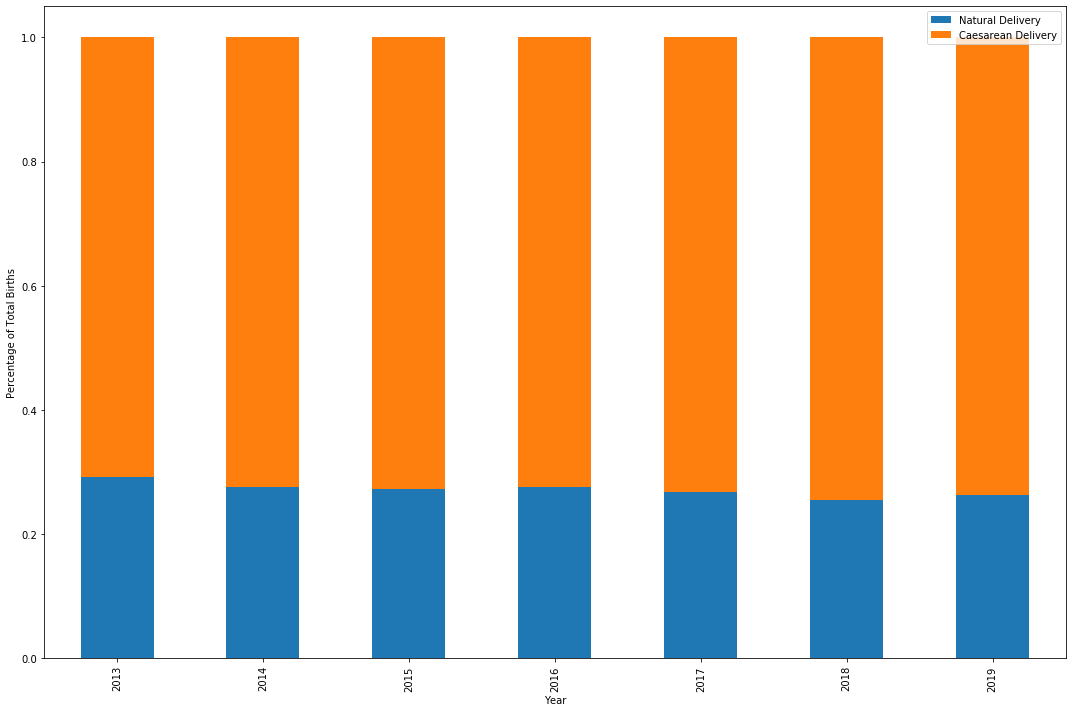

In [34]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
Natural = [Natural_13_P, Natural_14_P,Natural_15_P,Natural_16_P,Natural_17_P,Natural_18_P,Natural_19_P]
Caesarean = [Caesarean_13_P,Caesarean_14_P,Caesarean_15_P,Caesarean_16_P,Caesarean_17_P,Caesarean_18_P,Caesarean_19_P]

df= pd.DataFrame({
    'Natural Delivery':Natural,
    'Caesarean Delivery':Caesarean
},index=labels)

ax=df.plot(kind='bar',stacked=True,figsize=(15,10))
ax.set_ylabel('Percentage of Total Births')
ax.set_xlabel('Year')
ax.legend(labels=["Natural Delivery","Caesarean Delivery"])
ax.figure.tight_layout()
ax.figure.savefig('Change_in_Delivery_Method.png', dpi=480)

# Analysing the Change in ICD 10 Delivery Codes

In [35]:
data_13=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2013),]
data_14=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2014),]
data_15=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2015),]
data_16=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2016),]
data_17=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2017),]
data_18=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2018),]
data_19=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2019),]
data_20=data.loc[(["Scheme A","Scheme_B","Scheme_C"],2020),]

In [36]:
O80_13=len(data_13[data_13["Final_Diagnosis"] == 'O80.0'])+len(data_13[data_13["Final_Diagnosis"] == 'O80.1'])+len(data_13[data_13["Final_Diagnosis"] == 'O80.8'])+len(data_13[data_13["Final_Diagnosis"] == 'O80.9'])
O81_13=len(data_13[data_13["Final_Diagnosis"] == 'O81.0'])+len(data_13[data_13["Final_Diagnosis"] == 'O81.1'])+len(data_13[data_13["Final_Diagnosis"] == 'O81.2'])+len(data_13[data_13["Final_Diagnosis"] == 'O81.3'])+len(data_13[data_13["Final_Diagnosis"] == 'O81.4'])+len(data_13[data_13["Final_Diagnosis"] == 'O81.5'])
O82_13=len(data_13[data_13["Final_Diagnosis"] == 'O82.0'])+len(data_13[data_13["Final_Diagnosis"] == 'O82.1'])+len(data_13[data_13["Final_Diagnosis"] == 'O82.2'])+len(data_13[data_13["Final_Diagnosis"] == 'O82.8'])+len(data_13[data_13["Final_Diagnosis"] == 'O82.9'])
O83_13=len(data_13[data_13["Final_Diagnosis"] == 'O83.0'])+len(data_13[data_13["Final_Diagnosis"] == 'O83.1'])+len(data_13[data_13["Final_Diagnosis"] == 'O83.2'])+len(data_13[data_13["Final_Diagnosis"] == 'O83.3'])+len(data_13[data_13["Final_Diagnosis"] == 'O83.4'])+len(data_13[data_13["Final_Diagnosis"] == 'O83.8'])+len(data_13[data_13["Final_Diagnosis"] == 'O83.9'])
O84_13=len(data_13[data_13["Final_Diagnosis"] == 'O84.0'])+len(data_13[data_13["Final_Diagnosis"] == 'O84.1'])+len(data_13[data_13["Final_Diagnosis"] == 'O84.2'])+len(data_13[data_13["Final_Diagnosis"] == 'O84.8'])+len(data_13[data_13["Final_Diagnosis"] == 'O84.9'])

total_13=O80_13+O81_13+O82_13+O83_13+O84_13

pO80_13=O80_13/total_13
pO81_13=O81_13/total_13
pO82_13=O82_13/total_13
pO83_13=O83_13/total_13
pO84_13=O84_13/total_13

In [37]:
O80_14=len(data_14[data_14["Final_Diagnosis"] == 'O80.0'])+len(data_14[data_14["Final_Diagnosis"] == 'O80.1'])+len(data_14[data_14["Final_Diagnosis"] == 'O80.8'])+len(data_14[data_14["Final_Diagnosis"] == 'O80.9'])
O81_14=len(data_14[data_14["Final_Diagnosis"] == 'O81.0'])+len(data_14[data_14["Final_Diagnosis"] == 'O81.1'])+len(data_14[data_14["Final_Diagnosis"] == 'O81.2'])+len(data_14[data_14["Final_Diagnosis"] == 'O81.3'])+len(data_14[data_14["Final_Diagnosis"] == 'O81.4'])+len(data_14[data_14["Final_Diagnosis"] == 'O81.5'])
O82_14=len(data_14[data_14["Final_Diagnosis"] == 'O82.0'])+len(data_14[data_14["Final_Diagnosis"] == 'O82.1'])+len(data_14[data_14["Final_Diagnosis"] == 'O82.2'])+len(data_14[data_14["Final_Diagnosis"] == 'O82.8'])+len(data_14[data_14["Final_Diagnosis"] == 'O82.9'])
O83_14=len(data_14[data_14["Final_Diagnosis"] == 'O83.0'])+len(data_14[data_14["Final_Diagnosis"] == 'O83.1'])+len(data_14[data_14["Final_Diagnosis"] == 'O83.2'])+len(data_14[data_14["Final_Diagnosis"] == 'O83.3'])+len(data_14[data_14["Final_Diagnosis"] == 'O83.4'])+len(data_14[data_14["Final_Diagnosis"] == 'O83.8'])+len(data_14[data_14["Final_Diagnosis"] == 'O83.9'])
O84_14=len(data_14[data_14["Final_Diagnosis"] == 'O84.0'])+len(data_14[data_14["Final_Diagnosis"] == 'O84.1'])+len(data_14[data_14["Final_Diagnosis"] == 'O84.2'])+len(data_14[data_14["Final_Diagnosis"] == 'O84.8'])+len(data_14[data_14["Final_Diagnosis"] == 'O84.9'])

total_14=O80_14+O81_14+O82_14+O83_14+O84_14

pO80_14=O80_14/total_14
pO81_14=O81_14/total_14
pO82_14=O82_14/total_14
pO83_14=O83_14/total_14
pO84_14=O84_14/total_14

In [38]:
O80_15=len(data_15[data_15["Final_Diagnosis"] == 'O80.0'])+len(data_15[data_15["Final_Diagnosis"] == 'O80.1'])+len(data_15[data_15["Final_Diagnosis"] == 'O80.8'])+len(data_15[data_15["Final_Diagnosis"] == 'O80.9'])
O81_15=len(data_15[data_15["Final_Diagnosis"] == 'O81.0'])+len(data_15[data_15["Final_Diagnosis"] == 'O81.1'])+len(data_15[data_15["Final_Diagnosis"] == 'O81.2'])+len(data_15[data_15["Final_Diagnosis"] == 'O81.3'])+len(data_15[data_15["Final_Diagnosis"] == 'O81.4'])+len(data_15[data_15["Final_Diagnosis"] == 'O81.5'])
O82_15=len(data_15[data_15["Final_Diagnosis"] == 'O82.0'])+len(data_15[data_15["Final_Diagnosis"] == 'O82.1'])+len(data_15[data_15["Final_Diagnosis"] == 'O82.2'])+len(data_15[data_15["Final_Diagnosis"] == 'O82.8'])+len(data_15[data_15["Final_Diagnosis"] == 'O82.9'])
O83_15=len(data_15[data_15["Final_Diagnosis"] == 'O83.0'])+len(data_15[data_15["Final_Diagnosis"] == 'O83.1'])+len(data_15[data_15["Final_Diagnosis"] == 'O83.2'])+len(data_15[data_15["Final_Diagnosis"] == 'O83.3'])+len(data_15[data_15["Final_Diagnosis"] == 'O83.4'])+len(data_15[data_15["Final_Diagnosis"] == 'O83.8'])+len(data_15[data_15["Final_Diagnosis"] == 'O83.9'])
O84_15=len(data_15[data_15["Final_Diagnosis"] == 'O84.0'])+len(data_15[data_15["Final_Diagnosis"] == 'O84.1'])+len(data_15[data_15["Final_Diagnosis"] == 'O84.2'])+len(data_15[data_15["Final_Diagnosis"] == 'O84.8'])+len(data_15[data_15["Final_Diagnosis"] == 'O84.9'])

total_15=O80_15+O81_15+O82_15+O83_15+O84_15

pO80_15=O80_15/total_15
pO81_15=O81_15/total_15
pO82_15=O82_15/total_15
pO83_15=O83_15/total_15
pO84_15=O84_15/total_15

In [39]:
O80_16=len(data_16[data_16["Final_Diagnosis"] == 'O80.0'])+len(data_16[data_16["Final_Diagnosis"] == 'O80.1'])+len(data_16[data_16["Final_Diagnosis"] == 'O80.8'])+len(data_16[data_16["Final_Diagnosis"] == 'O80.9'])
O81_16=len(data_16[data_16["Final_Diagnosis"] == 'O81.0'])+len(data_16[data_16["Final_Diagnosis"] == 'O81.1'])+len(data_16[data_16["Final_Diagnosis"] == 'O81.2'])+len(data_16[data_16["Final_Diagnosis"] == 'O81.3'])+len(data_16[data_16["Final_Diagnosis"] == 'O81.4'])+len(data_16[data_16["Final_Diagnosis"] == 'O81.5'])
O82_16=len(data_16[data_16["Final_Diagnosis"] == 'O82.0'])+len(data_16[data_16["Final_Diagnosis"] == 'O82.1'])+len(data_16[data_16["Final_Diagnosis"] == 'O82.2'])+len(data_16[data_16["Final_Diagnosis"] == 'O82.8'])+len(data_16[data_16["Final_Diagnosis"] == 'O82.9'])
O83_16=len(data_16[data_16["Final_Diagnosis"] == 'O83.0'])+len(data_16[data_16["Final_Diagnosis"] == 'O83.1'])+len(data_16[data_16["Final_Diagnosis"] == 'O83.2'])+len(data_16[data_16["Final_Diagnosis"] == 'O83.3'])+len(data_16[data_16["Final_Diagnosis"] == 'O83.4'])+len(data_16[data_16["Final_Diagnosis"] == 'O83.8'])+len(data_16[data_16["Final_Diagnosis"] == 'O83.9'])
O84_16=len(data_16[data_16["Final_Diagnosis"] == 'O84.0'])+len(data_16[data_16["Final_Diagnosis"] == 'O84.1'])+len(data_16[data_16["Final_Diagnosis"] == 'O84.2'])+len(data_16[data_16["Final_Diagnosis"] == 'O84.8'])+len(data_16[data_16["Final_Diagnosis"] == 'O84.9'])

total_16=O80_16+O81_16+O82_16+O83_16+O84_16

pO80_16=O80_16/total_16
pO81_16=O81_16/total_16
pO82_16=O82_16/total_16
pO83_16=O83_16/total_16
pO84_16=O84_16/total_16

In [40]:
O80_17=len(data_17[data_17["Final_Diagnosis"] == 'O80.0'])+len(data_17[data_17["Final_Diagnosis"] == 'O80.1'])+len(data_17[data_17["Final_Diagnosis"] == 'O80.8'])+len(data_17[data_17["Final_Diagnosis"] == 'O80.9'])
O81_17=len(data_17[data_17["Final_Diagnosis"] == 'O81.0'])+len(data_17[data_17["Final_Diagnosis"] == 'O81.1'])+len(data_17[data_17["Final_Diagnosis"] == 'O81.2'])+len(data_17[data_17["Final_Diagnosis"] == 'O81.3'])+len(data_17[data_17["Final_Diagnosis"] == 'O81.4'])+len(data_17[data_17["Final_Diagnosis"] == 'O81.5'])
O82_17=len(data_17[data_17["Final_Diagnosis"] == 'O82.0'])+len(data_17[data_17["Final_Diagnosis"] == 'O82.1'])+len(data_17[data_17["Final_Diagnosis"] == 'O82.2'])+len(data_17[data_17["Final_Diagnosis"] == 'O82.8'])+len(data_17[data_17["Final_Diagnosis"] == 'O82.9'])
O83_17=len(data_17[data_17["Final_Diagnosis"] == 'O83.0'])+len(data_17[data_17["Final_Diagnosis"] == 'O83.1'])+len(data_17[data_17["Final_Diagnosis"] == 'O83.2'])+len(data_17[data_17["Final_Diagnosis"] == 'O83.3'])+len(data_17[data_17["Final_Diagnosis"] == 'O83.4'])+len(data_17[data_17["Final_Diagnosis"] == 'O83.8'])+len(data_17[data_17["Final_Diagnosis"] == 'O83.9'])
O84_17=len(data_17[data_17["Final_Diagnosis"] == 'O84.0'])+len(data_17[data_17["Final_Diagnosis"] == 'O84.1'])+len(data_17[data_17["Final_Diagnosis"] == 'O84.2'])+len(data_17[data_17["Final_Diagnosis"] == 'O84.8'])+len(data_17[data_17["Final_Diagnosis"] == 'O84.9'])

total_17=O80_17+O81_17+O82_17+O83_17+O84_17

pO80_17=O80_17/total_17
pO81_17=O81_17/total_17
pO82_17=O82_17/total_17
pO83_17=O83_17/total_17
pO84_17=O84_17/total_17

In [41]:
O80_18=len(data_18[data_18["Final_Diagnosis"] == 'O80.0'])+len(data_18[data_18["Final_Diagnosis"] == 'O80.1'])+len(data_18[data_18["Final_Diagnosis"] == 'O80.8'])+len(data_18[data_18["Final_Diagnosis"] == 'O80.9'])
O81_18=len(data_18[data_18["Final_Diagnosis"] == 'O81.0'])+len(data_18[data_18["Final_Diagnosis"] == 'O81.1'])+len(data_18[data_18["Final_Diagnosis"] == 'O81.2'])+len(data_18[data_18["Final_Diagnosis"] == 'O81.3'])+len(data_18[data_18["Final_Diagnosis"] == 'O81.4'])+len(data_18[data_18["Final_Diagnosis"] == 'O81.5'])
O82_18=len(data_18[data_18["Final_Diagnosis"] == 'O82.0'])+len(data_18[data_18["Final_Diagnosis"] == 'O82.1'])+len(data_18[data_18["Final_Diagnosis"] == 'O82.2'])+len(data_18[data_18["Final_Diagnosis"] == 'O82.8'])+len(data_18[data_18["Final_Diagnosis"] == 'O82.9'])
O83_18=len(data_18[data_18["Final_Diagnosis"] == 'O83.0'])+len(data_18[data_18["Final_Diagnosis"] == 'O83.1'])+len(data_18[data_18["Final_Diagnosis"] == 'O83.2'])+len(data_18[data_18["Final_Diagnosis"] == 'O83.3'])+len(data_18[data_18["Final_Diagnosis"] == 'O83.4'])+len(data_18[data_18["Final_Diagnosis"] == 'O83.8'])+len(data_18[data_18["Final_Diagnosis"] == 'O83.9'])
O84_18=len(data_18[data_18["Final_Diagnosis"] == 'O84.0'])+len(data_18[data_18["Final_Diagnosis"] == 'O84.1'])+len(data_18[data_18["Final_Diagnosis"] == 'O84.2'])+len(data_18[data_18["Final_Diagnosis"] == 'O84.8'])+len(data_18[data_18["Final_Diagnosis"] == 'O84.9'])

total_18=O80_18+O81_18+O82_18+O83_18+O84_18

pO80_18=O80_18/total_18
pO81_18=O81_18/total_18
pO82_18=O82_18/total_18
pO83_18=O83_18/total_18
pO84_18=O84_18/total_18

In [42]:
O80_19=len(data_19[data_19["Final_Diagnosis"] == 'O80.0'])+len(data_19[data_19["Final_Diagnosis"] == 'O80.1'])+len(data_19[data_19["Final_Diagnosis"] == 'O80.8'])+len(data_19[data_19["Final_Diagnosis"] == 'O80.9'])
O81_19=len(data_19[data_19["Final_Diagnosis"] == 'O81.0'])+len(data_19[data_19["Final_Diagnosis"] == 'O81.1'])+len(data_19[data_19["Final_Diagnosis"] == 'O81.2'])+len(data_19[data_19["Final_Diagnosis"] == 'O81.3'])+len(data_19[data_19["Final_Diagnosis"] == 'O81.4'])+len(data_19[data_19["Final_Diagnosis"] == 'O81.5'])
O82_19=len(data_19[data_19["Final_Diagnosis"] == 'O82.0'])+len(data_19[data_19["Final_Diagnosis"] == 'O82.1'])+len(data_19[data_19["Final_Diagnosis"] == 'O82.2'])+len(data_19[data_19["Final_Diagnosis"] == 'O82.8'])+len(data_19[data_19["Final_Diagnosis"] == 'O82.9'])
O83_19=len(data_19[data_19["Final_Diagnosis"] == 'O83.0'])+len(data_19[data_19["Final_Diagnosis"] == 'O83.1'])+len(data_19[data_19["Final_Diagnosis"] == 'O83.2'])+len(data_19[data_19["Final_Diagnosis"] == 'O83.3'])+len(data_19[data_19["Final_Diagnosis"] == 'O83.4'])+len(data_19[data_19["Final_Diagnosis"] == 'O83.8'])+len(data_19[data_19["Final_Diagnosis"] == 'O83.9'])
O84_19=len(data_19[data_19["Final_Diagnosis"] == 'O84.0'])+len(data_19[data_19["Final_Diagnosis"] == 'O84.1'])+len(data_19[data_19["Final_Diagnosis"] == 'O84.2'])+len(data_19[data_19["Final_Diagnosis"] == 'O84.8'])+len(data_19[data_19["Final_Diagnosis"] == 'O84.9'])

total_19=O80_19+O81_19+O82_19+O83_19+O84_19

pO80_19=O80_19/total_19
pO81_19=O81_19/total_19
pO82_19=O82_19/total_19
pO83_19=O83_19/total_19
pO84_19=O84_19/total_19

In [43]:
df= pd.DataFrame({
    'O80':O80,
    'O81':O81,
    'O82':O82,
    'O83':O83,
    'O84':O84
},index=labels)
df

,O80,O81,O82,O83,O84
2013,18245,1661,23947,28,111
2014,18245,1661,23947,28,111
2015,18245,1661,23947,28,111
2016,18245,1661,23947,28,111
2017,18245,1661,23947,28,111
2018,18245,1661,23947,28,111
2019,18245,1661,23947,28,111


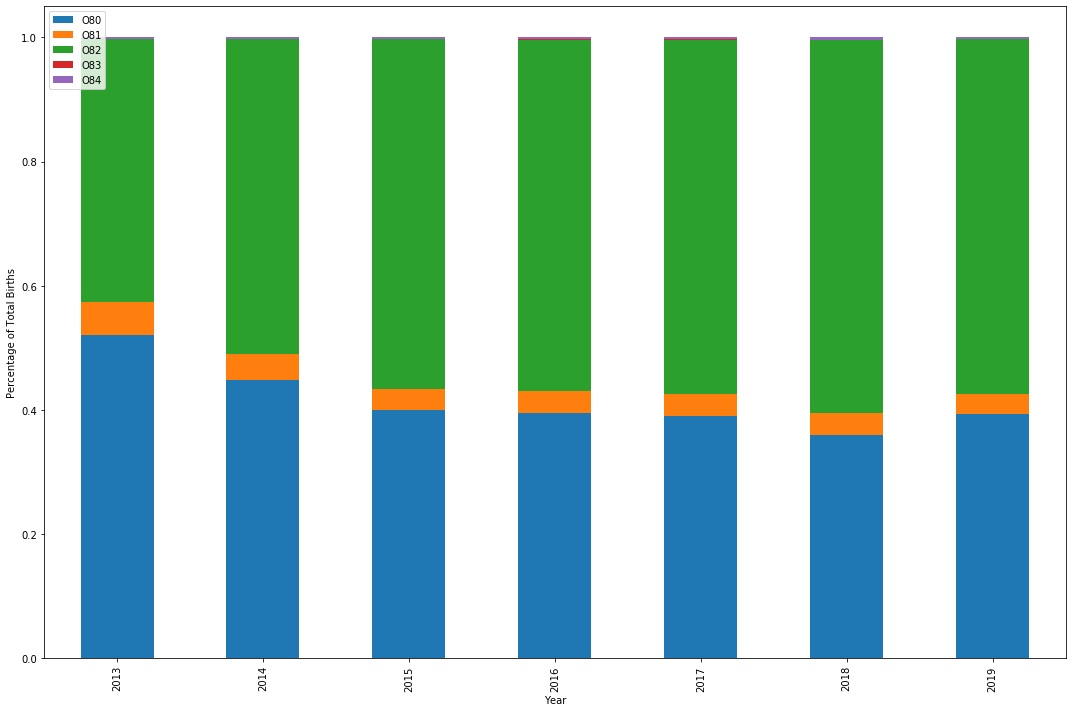

In [44]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
O80 = [pO80_13, pO80_14, pO80_15, pO80_16, pO80_17, pO80_18, pO80_19]
O81 = [pO81_13, pO81_14, pO81_15, pO81_16, pO81_17, pO81_18, pO81_19]
O82 = [pO82_13, pO82_14, pO82_15, pO82_16, pO82_17, pO82_18, pO82_19]
O83 = [pO83_13, pO83_14, pO83_15, pO83_16, pO83_17, pO83_18, pO83_19]
O84 = [pO84_13, pO84_14, pO84_15, pO84_16, pO84_17, pO84_18, pO84_19]

df= pd.DataFrame({
    'O80':O80,
    'O81':O81,
    'O82':O82,
    'O83':O83,
    'O84':O84
},index=labels)

ax=df.plot(kind='bar',stacked=True,figsize=(15,10))
ax.set_ylabel('Percentage of Total Births')
ax.set_xlabel('Year')
ax.legend(labels=["O80","O81","O82","O83","O84"],loc='upper left')
ax.figure.tight_layout()
ax.figure.savefig('Change_in_Delivery_Method_ICD.png', dpi=480)


## Analysing the Change in the Total Number of Births Per Year

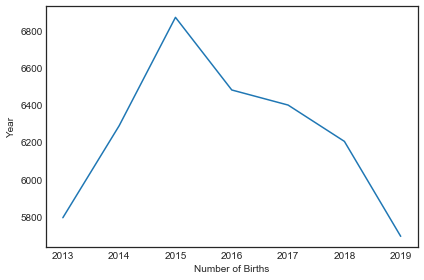

In [45]:
plt.style.use("seaborn-white")
yAxis=[total_13,total_14,total_15, total_16, total_17,total_18,total_19]
xAxis=[2013,2014,2015, 2016, 2017, 2018, 2019]

plt.plot(xAxis,yAxis)

plt.xlabel('Number of Births')
plt.ylabel('Year')

plt.tight_layout()
plt.savefig('Total_Births.png', dpi=480)

# Total Cost for Each Method Of Delivery (ICD 10)

In [46]:
Final_Diagnosis=data.groupby("Final_Diagnosis")

In [47]:
O80_data=pd.concat([Final_Diagnosis.get_group("O80.0"),Final_Diagnosis.get_group("O80.1"),Final_Diagnosis.get_group("O80.8"),Final_Diagnosis.get_group("O80.9")])
print(f'Average Cost of Single Spontaneous Delivery: {round(O80_data["Total_Cost"].mean(),2)}')

Average Cost of Single Spontaneous Delivery: 21947.27


In [48]:
O81_data=pd.concat([Final_Diagnosis.get_group("O81.0"),Final_Diagnosis.get_group("O81.1"),Final_Diagnosis.get_group("O81.2"),Final_Diagnosis.get_group("O81.3"),Final_Diagnosis.get_group("O81.4"),Final_Diagnosis.get_group("O81.5")])
print(f'Average Cost of Single Delivery by Forceps and Vacuum Extracter : {round(O81_data["Total_Cost"].mean(),2)}')

Average Cost of Single Delivery by Forceps and Vacuum Extracter : 23544.7


In [49]:
O82_data=pd.concat([Final_Diagnosis.get_group("O82.0"),Final_Diagnosis.get_group("O82.1"),Final_Diagnosis.get_group("O82.2"),Final_Diagnosis.get_group("O82.8"),Final_Diagnosis.get_group("O82.9")])
print(f'Average Cost of Single Delivery by Caesarean Section: {round(O82_data["Total_Cost"].mean(),2)}')

Average Cost of Single Delivery by Caesarean Section: 40202.35


In [50]:
O83_data=pd.concat([Final_Diagnosis.get_group("O83.0"),Final_Diagnosis.get_group("O83.1"),Final_Diagnosis.get_group("O83.2"),Final_Diagnosis.get_group("O83.8"),Final_Diagnosis.get_group("O83.9")])
print(f'Average Cost of Other Single Delivery: {round(O83_data["Total_Cost"].mean(),2)}')

Average Cost of Other Single Delivery: 28865.63


In [51]:
O84_data=pd.concat([Final_Diagnosis.get_group("O84.0"),Final_Diagnosis.get_group("O84.1"),Final_Diagnosis.get_group("O84.2"),Final_Diagnosis.get_group("O84.8"),Final_Diagnosis.get_group("O84.9")])
print(f'Average Cost of Multiple Delivery: {round(O84_data["Total_Cost"].mean(),2)}')

Average Cost of Multiple Delivery: 39358.27


# Total Cost for Natural and Caesarean Delivery (Admission Category)

In [52]:
adm_cat=data.groupby("Admission_Category")
Natural_Delivery=adm_cat.get_group("Normal Delivery")
Caesarean_Delivery=adm_cat.get_group("Caesarean Delivery")

In [53]:
print(f'Average Cost of Natural Delivery: {round(Natural_Delivery["Total_Cost"].mean(),2)}')

Average Cost of Natural Delivery: 22396.88


In [54]:
print(f'Average Cost of Caesarean Delivery: {round(Caesarean_Delivery["Total_Cost"].mean(),2)}')

Average Cost of Caesarean Delivery: 39723.86


# Length of Hospital Stay and Method of Delivery (ICD 10)

In [55]:
print(f'Average Length of Stay for Single Spontaneous Delivery: {round(O80_data["Hosp_Length_Of_Stay"].mean(),2)}')


Average Length of Stay for Single Spontaneous Delivery: 1.79


In [56]:
print(f'Average Length of Stay for Single Delivery by Forceps and Vacuum Extracter: {round(O81_data["Hosp_Length_Of_Stay"].mean(),2)}')

Average Length of Stay for Single Delivery by Forceps and Vacuum Extracter: 1.97


In [57]:
print(f'Average Length of Stay for Single Delivery by Caesarean Section: {round(O82_data["Hosp_Length_Of_Stay"].mean(),2)}')

Average Length of Stay for Single Delivery by Caesarean Section: 2.89


In [58]:
print(f'Average Length of Stay for Other Single Delivery: {round(O83_data["Hosp_Length_Of_Stay"].mean(),2)}')

Average Length of Stay for Other Single Delivery: 2.21


In [59]:
print(f'Average Length of Stay for Multiple Delivery: {round(O84_data["Hosp_Length_Of_Stay"].mean(),2)}')

Average Length of Stay for Multiple Delivery: 2.9


# Length of Hospital Stay for Natural and Caesarean Delivery (Admission Category)

In [60]:
print(f'Average Length of Stay for Natural Delivery: {round(Natural_Delivery["Hosp_Length_Of_Stay"].mean(),2)}')

Average Length of Stay for Natural Delivery: 1.85


In [61]:
print(f'Average Length of Stay for Caesarean Delivery: {round(Caesarean_Delivery["Hosp_Length_Of_Stay"].mean(),2)}')

Average Length of Stay for Caesarean Delivery: 2.89


# Analysis of Cost Outlires

In [62]:
adm_cat=data.groupby("Admission_Category")
Caesarean_group=adm_cat.get_group("Caesarean Delivery")
Normal_group=adm_cat.get_group("Normal Delivery")

Analysis of Outlires 

In [63]:
from scipy.stats import zscore

In [64]:
total_cost_df_Normal=Normal_group["Total_Cost"]
total_cost_df_Caesarean=Caesarean_group["Total_Cost"]

Removing outlires

In [65]:
z_scores = zscore(total_cost_df_Normal)
abs_z_scores = np.abs(z_scores)
outlires = (abs_z_scores > 3)
Normal_outlires = Normal_group[outlires]
Normal_outlires

Scheme_Code  Plan_Key  Authorization_Key  Stg_Has_Key  \
         admit_year                                                         
Scheme A 2013               BON      20.0        770264480.0    337752077   
         2013               BON      20.0        850298700.0    440578531   
         2013               BON      20.0        770365388.0    337854536   
         2013               BON     240.0        850622410.0    447709514   
         2013               BON     277.0        850088856.0    435344910   
...                         ...       ...                ...          ...   
Scheme_C 2020                 C     731.0        913117741.0    701085603   
         2018                 C     731.0        907943795.0    634201200   
         2019                 C     731.0        912828288.0    687097608   
         2018                 C     731.0        908144010.0    622004005   
         2019                 C     731.0        911705980.0    656915675   

                      Member_Key  Beneficiary_Number Admission_Category  \
         admit_year                                                       
Scheme A 2013         2024589110                   0    Normal Delivery   
         2013         2024873826                   0    Normal Delivery   
         2013         2025636031                   0    Normal Delivery   
         2013        24002550091                   0    Normal Delivery   
         2013        27702782324                   0    Normal Delivery   
...                          ...                 ...                ...   
Scheme_C 2020        88100624872                   1    Normal Delivery   
         2018        88100635658                   0    Normal Delivery   
         2019        88100635665                   1    Normal Delivery   
         2018        88100637869                   1    Normal Delivery   
         2019        88100655267                   1    Normal Delivery   

                    Date_Of_Birth  Admit_Month  Age_At_Treatment  ...  \
         admit_year                                               ...   
Scheme A 2013          1974-09-25       201303                38  ...   
         2013          1983-12-10       201309                29  ...   
         2013          1986-06-09       201302                26  ...   
         2013          1977-03-22       201311                36  ...   
         2013          1981-06-01       201308                32  ...   
...                           ...          ...               ...  ...   
Scheme_C 2020          1987-04-24       202003                32  ...   
         2018          1978-07-27       201807                40  ...   
         2019          1988-11-04       201912                31  ...   
         2018          1981-04-19       201803                36  ...   
         2019          1998-01-18       201902                21  ...   

                    Pharmacy_Amt Age_Group Pulse_Paypoint_Code  Dpm_Ind  \
         admit_year                                                       
Scheme A 2013             143.17   36 - 40           BON124EY4    Group   
         2013               0.00   26 - 30           BON001PRE    Group   
         2013            1000.01   26 - 30           BON124EY5    Group   
         2013               0.00   36 - 40           BON006SAI    Group   
         2013               0.00   31 - 35           BON040NNM    Group   
...                          ...       ...                 ...      ...   
Scheme_C 2020             204.70   31 - 35           SMD011MIN    Group   
         2018             394.99   36 - 40           SMD011MIN    Group   
         2019              56.95   31 - 35           SMD003SYN    Group   
         2018               0.00   36 - 40           SMD011MIN    Group   
         2019             606.67   21 - 25           SMD003SYN    Group   

                    Beneficiary_Type        Plan_Name  Pmb_Eligible  \
         admit_year                          

In [66]:
z_scores = zscore(total_cost_df_Normal)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
Normal_group = Normal_group[filtered_entries]
Normal_group

Scheme_Code  Plan_Key  Authorization_Key  Stg_Has_Key  \
         admit_year                                                         
Scheme A 2013               BON      20.0        769012710.0    337573074   
         2013               BON      20.0        768751860.0    337574069   
         2013               BON      20.0        825871979.0    337574855   
         2013               BON      20.0        769216193.0    337575388   
         2013               BON      20.0        850562974.0    443087111   
...                         ...       ...                ...          ...   
Scheme_C 2019                 C     731.0        912280411.0    672346712   
         2020                 C     731.0        913123197.0    698088738   
         2020                 C     731.0        913251585.0    700772846   
         2020                 C     731.0        912910930.0    690643272   
         2020                 C     731.0        913063789.0    699526386   

                      Member_Key  Beneficiary_Number Admission_Category  \
         admit_year                                                       
Scheme A 2013         2000156110                   2    Normal Delivery   
         2013         2000230971                   4    Normal Delivery   
         2013         2000282455                   2    Normal Delivery   
         2013         2000310217                   0    Normal Delivery   
         2013         2000382489                   3    Normal Delivery   
...                          ...                 ...                ...   
Scheme_C 2019        88100660489                   1    Normal Delivery   
         2020        88100661976                   0    Normal Delivery   
         2020        88100662030                   3    Normal Delivery   
         2020        88100668948                   1    Normal Delivery   
         2020        88100669882                   1    Normal Delivery   

                    Date_Of_Birth  Admit_Month  Age_At_Treatment  ...  \
         admit_year                                               ...   
Scheme A 2013          1994-05-05       201303                18  ...   
         2013          1992-11-21       201301                20  ...   
         2013          1992-05-17       201304                20  ...   
         2013          1968-09-19       201301                44  ...   
         2013          1994-05-11       201310                19  ...   
...                           ...          ...               ...  ...   
Scheme_C 2019          1993-03-25       201907                26  ...   
         2020          1994-04-02       202002                25  ...   
         2020          1991-08-28       202003                28  ...   
         2020          1988-03-21       202001                31  ...   
         2020          1988-06-28       202002                31  ...   

                    Pharmacy_Amt Age_Group Pulse_Paypoint_Code  Dpm_Ind  \
         admit_year                                                       
Scheme A 2013               0.00   16 - 20           BON033GDE    Group   
         2013               0.00   16 - 20           BON001JHM    Group   
         2013              84.68   16 - 20           BON001JHM    Group   
         2013               0.00   41 - 45           BON124EHB    Group   
         2013               0.00   16 - 20           BON004PEM    Group   
...                          ...       ...                 ...      ...   
Scheme_C 2019            1023.01   26 - 30           SMD003SMI    Group   
         2020             304.67   21 - 25           SMD003SYN    Group   
         2020             179.74   26 - 30           SMD004CHE    Group   
         2020             162.47   31 - 35           SMD003SYN    Group   
         2020               0.00   31 - 35           SMD011MIN    Group   

                    Beneficiary_Type        Plan_Name  Pmb_Eligible  \
         admit_year                          

In [67]:
z_scores = zscore(total_cost_df_Caesarean)
abs_z_scores = np.abs(z_scores)
outlires = (abs_z_scores > 3)
Caesarean_outlires = Caesarean_group[outlires]
Caesarean_outlires

Scheme_Code  Plan_Key  Authorization_Key  Stg_Has_Key  \
         admit_year                                                         
Scheme A 2013               BON      20.0        850552850.0    440131470   
         2013               BON      20.0        850545560.0    443634454   
         2013               BON      20.0        831097425.0    432615235   
         2013               BON      20.0        850308383.0    439388517   
         2013               BON      20.0        850566428.0    442656524   
...                         ...       ...                ...          ...   
Scheme_C 2019                 C     731.0        911722447.0    661137227   
         2019                 C     731.0        912296911.0    675411702   
         2018                 C     731.0        909153697.0    646574989   
         2018                 C     731.0        910794435.0    653310988   
         2020                 C     731.0        913223833.0    701085820   

                      Member_Key  Beneficiary_Number  Admission_Category  \
         admit_year                                                        
Scheme A 2013         2000809302                   0  Caesarean Delivery   
         2013         2001005954                   0  Caesarean Delivery   
         2013         2001759468                   0  Caesarean Delivery   
         2013         2023967355                   0  Caesarean Delivery   
         2013         2024161325                   2  Caesarean Delivery   
...                          ...                 ...                 ...   
Scheme_C 2019        88100605695                   1  Caesarean Delivery   
         2019        88100611249                   0  Caesarean Delivery   
         2018        88100624827                   1  Caesarean Delivery   
         2018        88100644003                   0  Caesarean Delivery   
         2020        88100656912                   0  Caesarean Delivery   

                    Date_Of_Birth  Admit_Month  Age_At_Treatment  ...  \
         admit_year                                               ...   
Scheme A 2013          1972-12-02       201309                40  ...   
         2013          1977-05-11       201310                36  ...   
         2013          1972-04-07       201308                41  ...   
         2013          1978-02-25       201309                35  ...   
         2013          1980-12-12       201310                32  ...   
...                           ...          ...               ...  ...   
Scheme_C 2019          1988-07-25       201902                30  ...   
         2019          1977-04-28       201908                42  ...   
         2018          1981-03-28       201810                37  ...   
         2018          1979-10-10       201811                39  ...   
         2020          1982-11-22       202002                37  ...   

                    Pharmacy_Amt Age_Group Pulse_Paypoint_Code  Dpm_Ind  \
         admit_year                                                       
Scheme A 2013               0.00   36 - 40           BON019KTP    Group   
         2013             954.95   36 - 40           BON039GHE    Group   
         2013               0.00   41 - 45           BON019NPE    Group   
         2013               0.00   31 - 35           BON001JHM    Group   
         2013               0.00   31 - 35           BON124EY5    Group   
...                          ...       ...                 ...      ...   
Scheme_C 2019               0.00   26 - 30           SMD003SYN    Group   
         2019               0.00   41 - 45           SMD006NAT    Group   
         2018               0.00   36 - 40           SMD005CHE    Group   
         2018               0.00   36 - 40           SMD011MIN    Group   
         2020             627.44   36 - 40           SMD011MIN    Group   

                    Beneficiary_Type        Plan_Name  Pmb_Eligible  \
         admit_year             

In [68]:
z_scores = zscore(total_cost_df_Caesarean)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
Caesarean_group = Caesarean_group[filtered_entries]
Caesarean_group

Scheme_Code  Plan_Key  Authorization_Key  Stg_Has_Key  \
         admit_year                                                         
Scheme A 2013               BON      20.0        769252214.0    425810854   
         2013               BON      20.0        770333964.0    426326697   
         2013               BON      20.0        769170413.0    337573090   
         2013               BON      20.0        825623065.0    426069394   
         2013               BON      20.0        850630482.0    442210545   
...                         ...       ...                ...          ...   
Scheme_C 2019                 C     731.0        912758943.0    688172698   
         2020                 C     731.0        913026937.0    701398244   
         2019                 C     731.0        912810835.0    687097784   
         2020                 C     731.0        913064135.0    699526385   
         2020                 C     731.0        913176090.0    702333359   

                      Member_Key  Beneficiary_Number  Admission_Category  \
         admit_year                                                        
Scheme A 2013         2000141125                   2  Caesarean Delivery   
         2013         2000149969                   5  Caesarean Delivery   
         2013         2000157858                   1  Caesarean Delivery   
         2013         2000173667                   4  Caesarean Delivery   
         2013         2000238461                   4  Caesarean Delivery   
...                          ...                 ...                 ...   
Scheme_C 2019        88100666452                   2  Caesarean Delivery   
         2020        88100666854                   0  Caesarean Delivery   
         2019        88100667705                   1  Caesarean Delivery   
         2020        88100668742                   2  Caesarean Delivery   
         2020        88100669260                   1  Caesarean Delivery   

                    Date_Of_Birth  Admit_Month  Age_At_Treatment  ...  \
         admit_year                                               ...   
Scheme A 2013          1984-05-16       201304                28  ...   
         2013          1994-11-14       201302                18  ...   
         2013          1995-02-21       201302                18  ...   
         2013          1987-12-04       201305                25  ...   
         2013          1982-08-05       201311                31  ...   
...                           ...          ...               ...  ...   
Scheme_C 2019          1993-01-19       201912                26  ...   
         2020          1982-08-23       202002                37  ...   
         2019          1988-02-02       201911                31  ...   
         2020          1997-08-17       202002                22  ...   
         2020          1998-10-18       202003                21  ...   

                    Pharmacy_Amt Age_Group Pulse_Paypoint_Code     Dpm_Ind  \
         admit_year                                                          
Scheme A 2013               0.00   26 - 30           BON019KHG       Group   
         2013               0.00   16 - 20           BON004QUE       Group   
         2013               0.00   16 - 20           BON019NPE       Group   
         2013               0.00   21 - 25           BON056EDW       Group   
         2013               0.00   31 - 35           BON002STE       Group   
...                          ...       ...                 ...         ...   
Scheme_C 2019             478.51   26 - 30           SMD011MIN       Group   
         2020             132.39   36 - 40           SMD009DP1  Individual   
         2019             251.14   31 - 35           SMD011MIN       Group   
         2020             252.52   21 - 25           SMD004CHE       Group   
         2020             210.07   21 - 25           SMD011MIN       Group   

                    Beneficiary_Type        Plan_Name  Pmb_Eligi

# Analysis of Costs

In [69]:
total_cost=round(Caesarean_group["Total_Cost"].sum(),2)
hospital_benefit=round(Caesarean_group["Hosp_Benefit_Amt"].sum(),2)
provider=round(Caesarean_group["Provider_Amt"].sum(),2)
radiology=round(Caesarean_group["Radiology_Amt"].sum(),2)
pathology=round(Caesarean_group["Pathology_Amt"].sum(),2)
pharmacy=round(Caesarean_group["Pharmacy_Amt"].sum(),2)

hospital_perc1=hospital_benefit/total_cost
provider_perc1=provider/total_cost
radiology_perc1=radiology/total_cost
pathology_perc1=pathology/total_cost
pharmacy_perc1=pharmacy/total_cost
unallocated1=(total_cost-hospital_benefit-provider-radiology-pathology-pharmacy)/total_cost

In [70]:
total_cost=round(Normal_group["Total_Cost"].sum(),2)
hospital_benefit=round(Normal_group["Hosp_Benefit_Amt"].sum(),2)
provider=round(Normal_group["Provider_Amt"].sum(),2)
radiology=round(Normal_group["Radiology_Amt"].sum(),2)
pathology=round(Normal_group["Pathology_Amt"].sum(),2)
pharmacy=round(Normal_group["Pharmacy_Amt"].sum(),2)

hospital_perc2=hospital_benefit/total_cost
provider_perc2=provider/total_cost
radiology_perc2=radiology/total_cost
pathology_perc2=pathology/total_cost
pharmacy_perc2=pharmacy/total_cost
unallocated2=(total_cost-hospital_benefit-provider-radiology-pathology-pharmacy)/total_cost

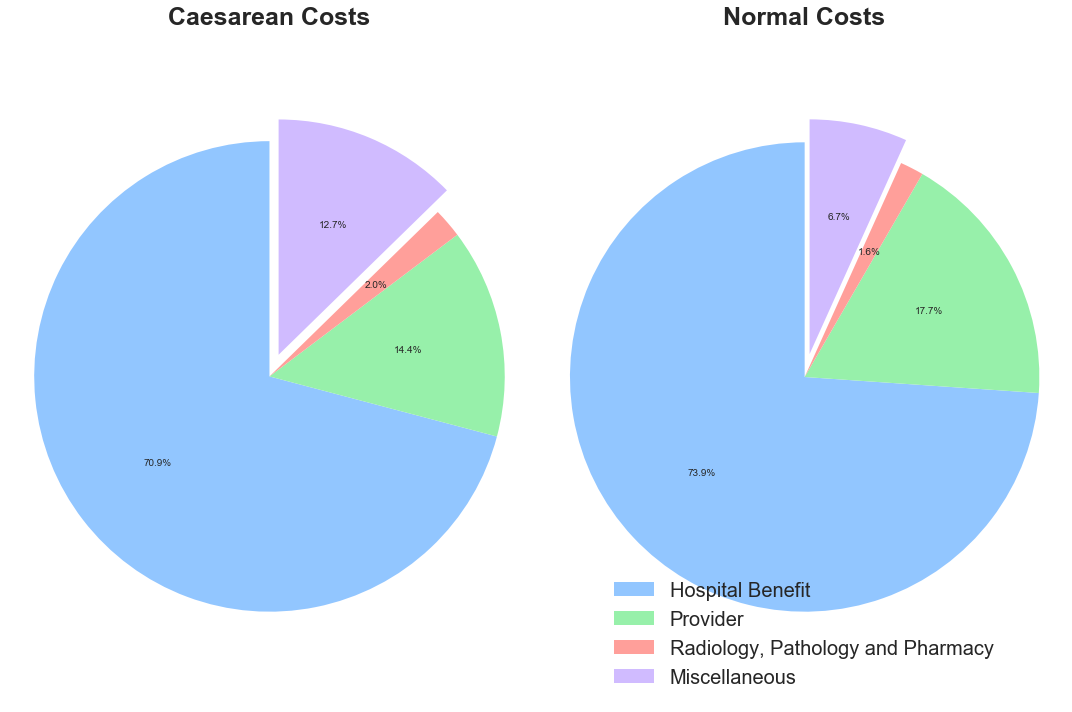

In [71]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.style.use("seaborn-pastel")

labels = ['Hospital Benefit',"Provider", 'Radiology, Pathology and Pharmacy', "Miscellaneous"]
sizes1 = [hospital_perc1, provider_perc1, radiology_perc1+pathology_perc1+pharmacy_perc1,unallocated1]
sizes2 = [hospital_perc2, provider_perc2, radiology_perc2+pathology_perc2+pharmacy_perc2,unallocated2]
explode = (0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))

ax1.pie(sizes1, explode=explode,labels=None, autopct='%1.1f%%', pctdistance=0.6, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Caesarean Costs',fontweight="bold",fontsize=25)

ax2.pie(sizes2, explode=explode,labels=None, autopct='%1.1f%%', pctdistance=0.6, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Normal Costs',fontweight="bold",fontsize=25)
plt.legend(labels=labels,loc="lower center", fontsize=20)

fig.subplots_adjust(wspace=0.1)


plt.tight_layout()
plt.savefig('Cost Breakdown.png', dpi=480)

# worth noting here that there are missing columns in provider amount so this would account for part of the 
# Miscellaneous costs 

## Calculating the difference in Hospital Benefit and Provider Costs for Natural and Caesarean deliveries

In [72]:
print(f'Average Hospital Benefit Amount per Patient that had a Natural Delivery: {round(Normal_group["Hosp_Benefit_Amt"].sum()/Normal_group["Member_ID"].nunique(),2)}')

Average Hospital Benefit Amount per Patient that had a Natural Delivery: 17733.55


In [73]:
print(f'Average Hospital Benefit Amount per Patient that had a Caesarean Section: {round(Caesarean_group["Hosp_Benefit_Amt"].sum()/Caesarean_group["Member_ID"].nunique(),2)}')

Average Hospital Benefit Amount per Patient that had a Caesarean Section: 30635.92


In [74]:
print(f'Average Provider Cost per Patient that had a Natural Delivery: {round(Normal_group["Provider_Amt"].sum()/Normal_group["Member_ID"].nunique(),2)}')

Average Provider Cost per Patient that had a Natural Delivery: 4252.73


In [75]:
print(f'Average Provider Cost per Patient that had a Caesarean Section: {round(Caesarean_group["Provider_Amt"].sum()/Caesarean_group["Member_ID"].nunique(),2)}')

Average Provider Cost per Patient that had a Caesarean Section: 6221.14


# Change in Costs Through the Years

In [76]:
number_of_pateients_2013=data_13['Member_ID'].nunique()
number_of_pateients_2014=data_14['Member_ID'].nunique()
number_of_pateients_2015=data_15['Member_ID'].nunique()
number_of_pateients_2016=data_16['Member_ID'].nunique()
number_of_pateients_2017=data_17['Member_ID'].nunique()
number_of_pateients_2018=data_18['Member_ID'].nunique()
number_of_pateients_2019=data_19['Member_ID'].nunique()

In [77]:
TC_13=data_13["Total_Cost"].sum()/number_of_pateients_2013
TC_14=data_14["Total_Cost"].sum()/number_of_pateients_2014
TC_15=data_15["Total_Cost"].sum()/number_of_pateients_2015
TC_16=data_16["Total_Cost"].sum()/number_of_pateients_2016
TC_17=data_17["Total_Cost"].sum()/number_of_pateients_2017
TC_18=data_18["Total_Cost"].sum()/number_of_pateients_2018
TC_19=data_19["Total_Cost"].sum()/number_of_pateients_2019

In [78]:
HB_13=data_13["Hosp_Benefit_Amt"].sum()/number_of_pateients_2013
HB_14=data_14["Hosp_Benefit_Amt"].sum()/number_of_pateients_2014
HB_15=data_15["Hosp_Benefit_Amt"].sum()/number_of_pateients_2015
HB_16=data_16["Hosp_Benefit_Amt"].sum()/number_of_pateients_2016
HB_17=data_17["Hosp_Benefit_Amt"].sum()/number_of_pateients_2017
HB_18=data_18["Hosp_Benefit_Amt"].sum()/number_of_pateients_2018
HB_19=data_19["Hosp_Benefit_Amt"].sum()/number_of_pateients_2019

In [79]:
PB_13=data_13["Provider_Amt"].sum()/number_of_pateients_2013
PB_14=data_14["Provider_Amt"].sum()/number_of_pateients_2014
PB_15=data_15["Provider_Amt"].sum()/number_of_pateients_2015
PB_16=data_16["Provider_Amt"].sum()/number_of_pateients_2016
PB_17=data_17["Provider_Amt"].sum()/number_of_pateients_2017
PB_18=data_18["Provider_Amt"].sum()/number_of_pateients_2018
PB_19=data_19["Provider_Amt"].sum()/number_of_pateients_2019

In [80]:
RA_13=data_13["Radiology_Amt"].sum()/number_of_pateients_2013
RA_14=data_14["Radiology_Amt"].sum()/number_of_pateients_2014
RA_15=data_15["Radiology_Amt"].sum()/number_of_pateients_2015
RA_16=data_16["Radiology_Amt"].sum()/number_of_pateients_2016
RA_17=data_17["Radiology_Amt"].sum()/number_of_pateients_2017
RA_18=data_18["Radiology_Amt"].sum()/number_of_pateients_2018
RA_19=data_19["Radiology_Amt"].sum()/number_of_pateients_2019

In [81]:
PA_13=data_13["Pathology_Amt"].sum()/number_of_pateients_2013
PA_14=data_14["Pathology_Amt"].sum()/number_of_pateients_2014
PA_15=data_15["Pathology_Amt"].sum()/number_of_pateients_2015
PA_16=data_16["Pathology_Amt"].sum()/number_of_pateients_2016
PA_17=data_17["Pathology_Amt"].sum()/number_of_pateients_2017
PA_18=data_18["Pathology_Amt"].sum()/number_of_pateients_2018
PA_19=data_19["Pathology_Amt"].sum()/number_of_pateients_2019

In [82]:
PH_13=data_13["Pharmacy_Amt"].sum()/number_of_pateients_2013
PH_14=data_14["Pharmacy_Amt"].sum()/number_of_pateients_2014
PH_15=data_15["Pharmacy_Amt"].sum()/number_of_pateients_2015
PH_16=data_16["Pharmacy_Amt"].sum()/number_of_pateients_2016
PH_17=data_17["Pharmacy_Amt"].sum()/number_of_pateients_2017
PH_18=data_18["Pharmacy_Amt"].sum()/number_of_pateients_2018
PH_19=data_19["Pharmacy_Amt"].sum()/number_of_pateients_2019

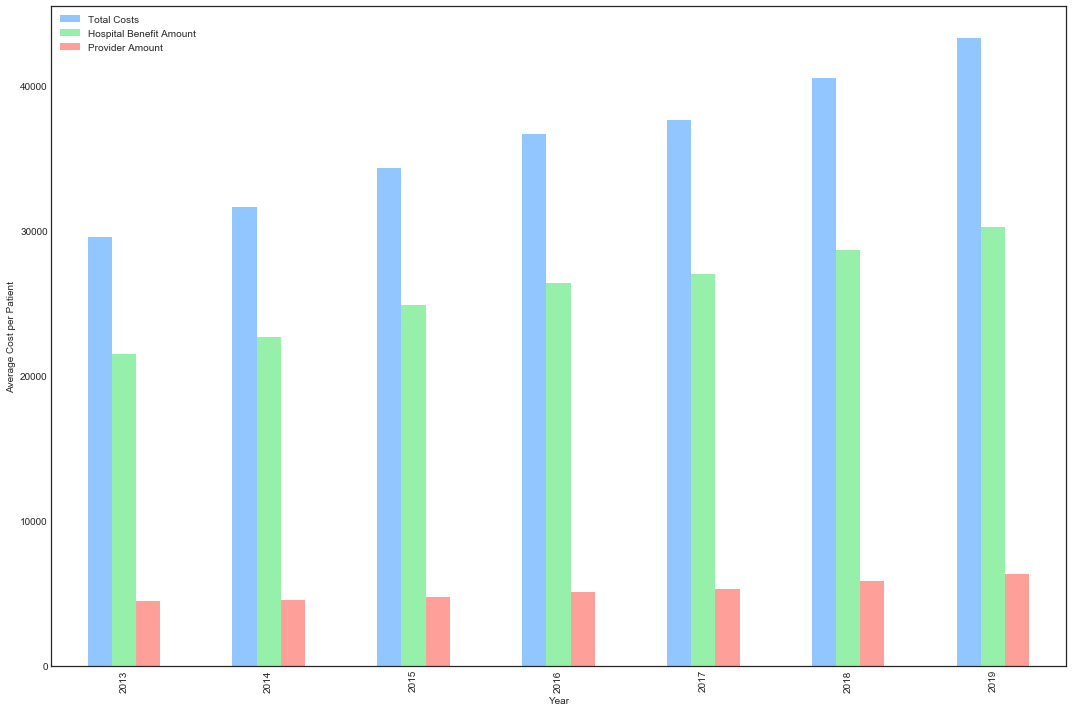

In [83]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
total_costs = [TC_13, TC_14, TC_15, TC_16, TC_17, TC_18, TC_19]
hospital_benefit = [HB_13, HB_14, HB_15, HB_16, HB_17,HB_18,HB_19]
provider_costs = [PB_13, PB_14, PB_15, PB_16, PB_17, PB_18, PB_19]


df1= pd.DataFrame({
    'Total Costs':total_costs,
    'Hospital Benefit Amount':hospital_benefit,
    'Provider Amount':provider_costs,
},index=labels)

ax1=df1.plot(kind='bar',figsize=(15,10))
ax1.set_ylabel('Average Cost per Patient')
ax1.set_xlabel('Year')

plt.tight_layout()
plt.savefig('Large Cost Breakdown.png', dpi=480)

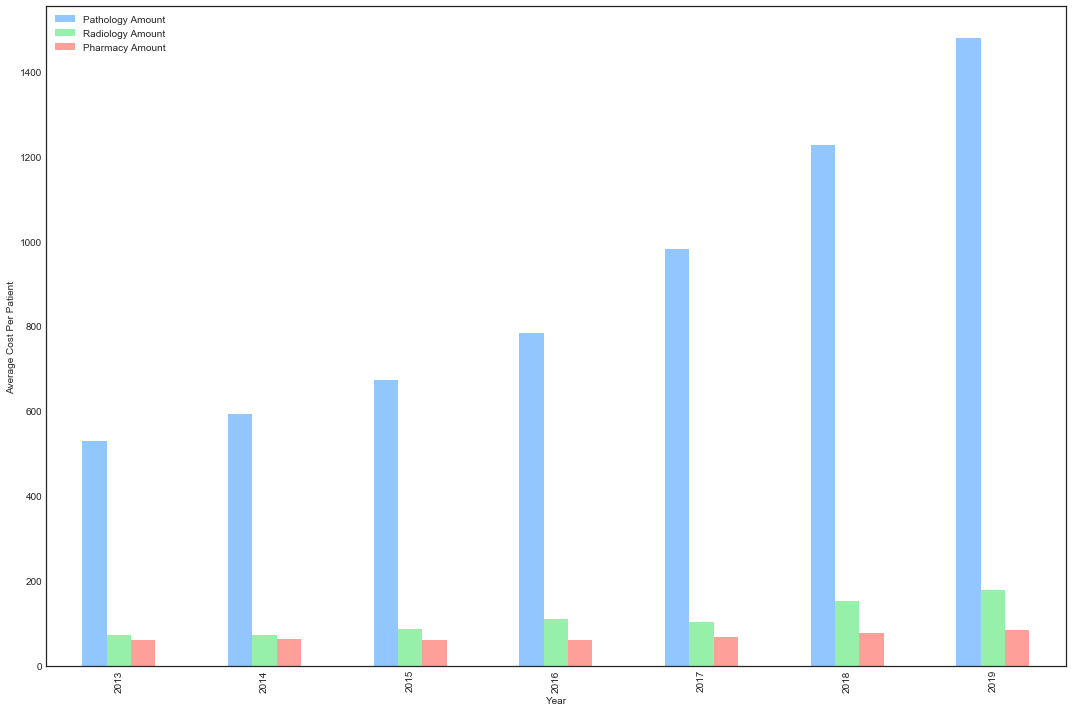

In [84]:
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']
pathology_costs = [PA_13, PA_14, PA_15, PA_16, PA_17, PA_18,PA_19]
radiology_costs=[RA_13, RA_14, RA_15, RA_16, RA_17,RA_18,RA_19]
pharmacy_costs=[PH_13, PH_14, PH_15, PH_16, PH_17,PH_18,PH_19]

df2= pd.DataFrame({
    'Pathology Amount':pathology_costs,
    'Radiology Amount':radiology_costs,
    'Pharmacy Amount':pharmacy_costs
},index=labels)


ax2=df2.plot(kind='bar',figsize=(15,10))
ax2.set_ylabel('Average Cost Per Patient')
ax2.set_xlabel('Year')


plt.tight_layout()
plt.savefig('Small Cost Breakdown.png', dpi=480)

In [85]:
df1

,Total Costs,Hospital Benefit Amount,Provider Amount
2013,29577.743353,21483.627614,4445.524605
2014,31612.365079,22676.280726,4538.238823
2015,34326.992678,24833.091221,4764.570384
2016,36634.937816,26373.404207,5121.141955
2017,37585.280852,26978.938681,5280.771190
2018,40528.689398,28664.076817,5882.421123
2019,43273.558177,30255.562874,6359.078651


In [86]:
df2

,Pathology Amount,Radiology Amount,Pharmacy Amount
2013,528.465645,73.783600,61.185068
2014,592.918820,73.583198,63.235631
2015,673.995721,86.919097,61.745041
2016,784.097900,111.477580,62.028326
2017,980.802244,104.414912,67.791039
2018,1226.798922,153.365087,77.376480
2019,1478.935847,179.304976,84.528355


In [87]:
change_in_total_costs=[0]*6
change_in_hospital_costs=[0]*6
change_in_provider_costs=[0]*6
change_in_pathology_costs=[0]*6
change_in_radiology_costs=[0]*6
change_in_pharmacy_costs=[0]*6

for i in range(6):
    change_in_total_costs[i]=(df1["Total Costs"][i+1]-df1["Total Costs"][i])/df1["Total Costs"][i]
    change_in_hospital_costs[i]=(df1["Hospital Benefit Amount"][i+1]-df1["Hospital Benefit Amount"][i])/df1["Hospital Benefit Amount"][i]
    change_in_provider_costs[i]=(df1["Provider Amount"][i+1]-df1["Provider Amount"][i])/df1["Provider Amount"][i]
    change_in_pathology_costs[i]=(df2["Pathology Amount"][i+1]-df2["Pathology Amount"][i])/df2["Pathology Amount"][i]
    change_in_radiology_costs[i]=(df2["Radiology Amount"][i+1]-df2["Radiology Amount"][i])/df2["Radiology Amount"][i]
    change_in_pharmacy_costs[i]=(df2["Pharmacy Amount"][i+1]-df2["Pharmacy Amount"][i])/df2["Pharmacy Amount"][i]

In [88]:
inflation=[0.0614,0.0451,0.0659,0.0518,0.0450,0.0412]

In [89]:
df= pd.DataFrame({
    'Change in Total Costs':change_in_total_costs,
    'Change in Hospital Benefit Amount':change_in_hospital_costs,
    'Change in Provider Amount':change_in_provider_costs,
    'Inflation in South Africa':inflation,
    'Change in Pathology Costs':change_in_pathology_costs,
    'Change in Radiology Costs':change_in_radiology_costs,
    'Change in Pharmacy Costs':change_in_pharmacy_costs
    
})
df

,Change in Total Costs,Change in Hospital Benefit Amount,Change in Provider Amount,Inflation in South Africa,Change in Pathology Costs,Change in Radiology Costs,Change in Pharmacy Costs
0,0.068789,0.055515,0.020856,0.0614,0.121963,-0.002716,0.033514
1,0.085872,0.095113,0.049872,0.0451,0.136742,0.181236,-0.023572
2,0.067234,0.062027,0.074838,0.0659,0.163357,0.282544,0.004588
3,0.025941,0.022960,0.031171,0.0518,0.250867,-0.063355,0.092905
4,0.078313,0.062461,0.113932,0.0450,0.250812,0.468804,0.141397
5,0.067727,0.055522,0.081031,0.0412,0.205524,0.169138,0.092430


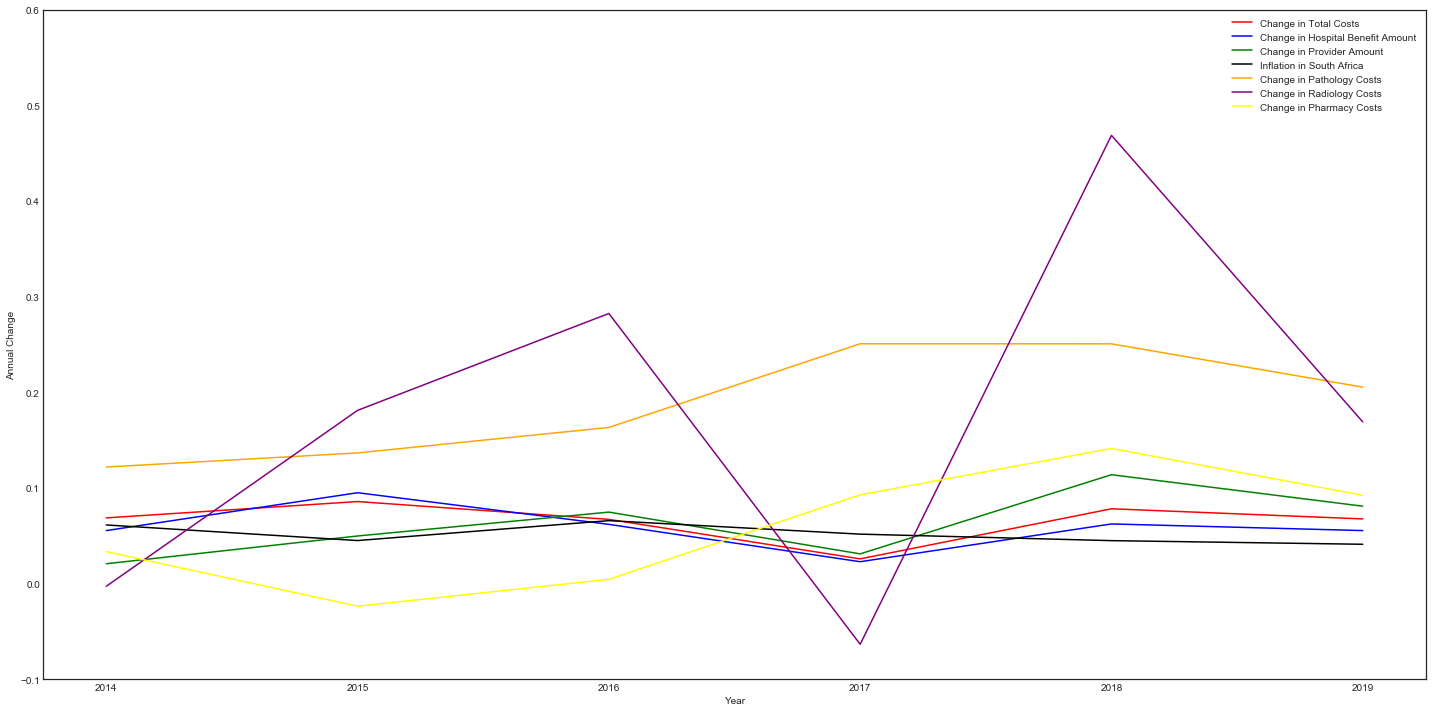

In [90]:
labels = ['2014', '2015', '2016', '2017', '2018', '2019']
colors=["red","blue","green","black","orange","purple","yellow"]
df= pd.DataFrame({
    'Change in Total Costs':change_in_total_costs,
    'Change in Hospital Benefit Amount':change_in_hospital_costs,
    'Change in Provider Amount':change_in_provider_costs,
    'Inflation in South Africa':inflation,
    'Change in Pathology Costs':change_in_pathology_costs,
    'Change in Radiology Costs':change_in_radiology_costs,
    'Change in Pharmacy Costs':change_in_pharmacy_costs
    
},index=labels)

ax=df.plot(kind='line',color=colors,figsize=(20,10))
ax.set_ylabel('Annual Change')
ax.set_xlabel('Year')
ax.set_ylim(-0.1,0.6)

plt.tight_layout()
plt.savefig('Change_in_costs.png', dpi=480)

# Analysing the Different Birthing Methods by Region in South Africa

In [91]:
data["Region_Descr"].unique()

array(['NORTHERN CAPE', 'KWAZULU NATAL', 'EASTERN CAPE', 'GAUTENG',
       'LIMPOPO', 'FREE STATE', 'NORTH WEST', 'MPUMALANGA',
       'WESTERN CAPE'], dtype=object)

In [92]:
data["Region_Descr"].value_counts()
# This shows us where the births are occuring

GAUTENG          42448
KWAZULU NATAL    15242
MPUMALANGA       15074
WESTERN CAPE     12676
EASTERN CAPE      8674
LIMPOPO           6585
FREE STATE        6120
NORTH WEST        4661
NORTHERN CAPE     3860
Name: Region_Descr, dtype: int64

In [93]:
region_of_delivery_no=data["Region_Descr"].value_counts()

In [94]:
region_of_delivery_no.name=''

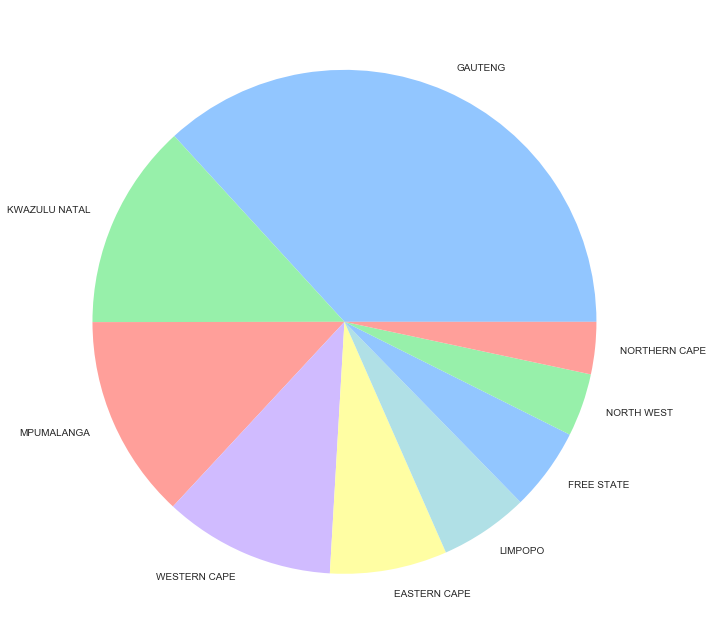

In [95]:
region_of_delivery_no.plot(kind="pie",legend=None,figsize=(10,10))
plt.tight_layout()
plt.savefig('Breakdown_of_region.png', dpi=480)

In [96]:
GAU_moms=data[data["Region_Descr"]=="GAUTENG"]
KZN_moms=data[data["Region_Descr"]=="KWAZULU NATAL"]
WC_moms=data[data["Region_Descr"]=="WESTERN CAPE"]
MP_moms=data[data["Region_Descr"]=="MPUMALANGA"]
EC_moms=data[data["Region_Descr"]=="EASTERN CAPE"]

In [97]:
try1=GAU_moms["Admission_Category"]=="Normal Delivery"
try2=GAU_moms["Admission_Category"]=="Caesarean Delivery"

try3=KZN_moms["Admission_Category"]=="Normal Delivery"
try4=KZN_moms["Admission_Category"]=="Caesarean Delivery"

try5=WC_moms["Admission_Category"]=="Normal Delivery"
try6=WC_moms["Admission_Category"]=="Caesarean Delivery"

try7=MP_moms["Admission_Category"]=="Normal Delivery"
try8=MP_moms["Admission_Category"]=="Caesarean Delivery"

try9=EC_moms["Admission_Category"]=="Normal Delivery"
try10=EC_moms["Admission_Category"]=="Caesarean Delivery"

In [98]:
{
    "GAU":GAU_moms[try1|try2]["Admission_Category"].value_counts(),
    "KZN":KZN_moms[try3|try4]["Admission_Category"].value_counts(),
    "WC":WC_moms[try5|try6]["Admission_Category"].value_counts(),
    "MP":MP_moms[try7|try8]["Admission_Category"].value_counts(),
    "EC":EC_moms[try9|try10]["Admission_Category"].value_counts()
}

{'GAU': Caesarean Delivery    21427
 Normal Delivery        8221
 Name: Admission_Category, dtype: int64,
 'KZN': Caesarean Delivery    7833
 Normal Delivery       2184
 Name: Admission_Category, dtype: int64,
 'WC': Caesarean Delivery    6784
 Normal Delivery       2579
 Name: Admission_Category, dtype: int64,
 'MP': Caesarean Delivery    7886
 Normal Delivery       3059
 Name: Admission_Category, dtype: int64,
 'EC': Caesarean Delivery    4523
 Normal Delivery       1742
 Name: Admission_Category, dtype: int64}

In [99]:
GAU_N=len(GAU_moms[try1])/len(GAU_moms[try1|try2])
GAU_C=len(GAU_moms[try2])/len(GAU_moms[try1|try2])

KZN_N=len(KZN_moms[try3])/len(KZN_moms[try3|try4])
KZN_C=len(KZN_moms[try4])/len(KZN_moms[try3|try4])

WC_N=len(WC_moms[try5])/len(WC_moms[try5|try6])
WC_C=len(WC_moms[try6])/len(WC_moms[try5|try6])

MP_N=len(MP_moms[try7])/len(MP_moms[try7|try8])
MP_C=len(MP_moms[try8])/len(MP_moms[try7|try8])

EC_N=len(EC_moms[try9])/len(EC_moms[try9|try10])
EC_C=len(EC_moms[try10])/len(EC_moms[try9|try10])

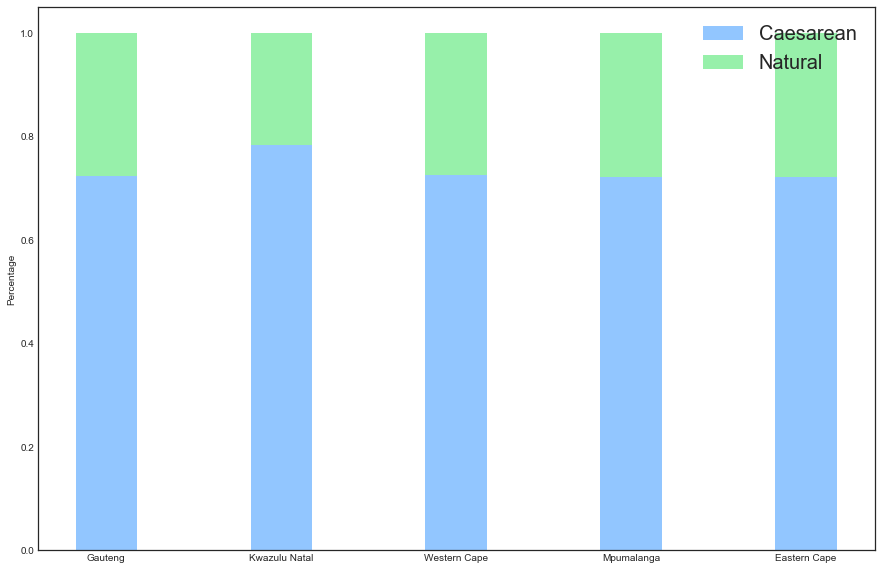

In [100]:
plt.style.use("seaborn-pastel")
labels = ['Gauteng','Kwazulu Natal','Western Cape', 'Mpumalanga', 'Eastern Cape']
Caeserian_Percentages = [GAU_C,KZN_C,WC_C,MP_C,EC_C]
Natural_Percentages = [GAU_N,KZN_N,WC_N,MP_N,EC_N]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, Caeserian_Percentages, width, label='Caesarean')
ax.bar(labels, Natural_Percentages, width, bottom=Caeserian_Percentages,
       label='Natural')

ax.set_ylabel('Percentage')
ax.legend(fontsize=20)

plt.show()

In [101]:
[Caeserian_Percentages,Natural_Percentages]

[[0.7227131678359417,
  0.7819706498951782,
  0.7245540959094308,
  0.7205116491548652,
  0.7219473264166002],
 [0.2772868321640583,
  0.2180293501048218,
  0.27544590409056924,
  0.2794883508451348,
  0.27805267358339986]]

# Comparing birth rates according to group or individual policies

In [102]:
ben_type=data.groupby("Dpm_Ind")

individuals=ben_type.get_group("Individual")
group=ben_type.get_group("Group")

In [103]:
individual1=individuals.groupby("Admission_Category")
group1=group.groupby("Admission_Category")

For Individuals:

In [104]:
{
    "Number of Normal Deliveries":len(individual1.get_group("Normal Delivery")),
    "Number of Caesarean Deliveries":len(individual1.get_group("Caesarean Delivery"))
}

{'Number of Normal Deliveries': 4084, 'Number of Caesarean Deliveries': 14335}

In [105]:
{
    "Percentage of Normal Deliveries":len(individual1.get_group("Normal Delivery"))/(len(individual1.get_group("Normal Delivery"))+len(individual1.get_group("Caesarean Delivery"))),
    "Percentage of Caesarean Deliveries":len(individual1.get_group("Caesarean Delivery"))/(len(individual1.get_group("Normal Delivery"))+len(individual1.get_group("Caesarean Delivery")))
}


{'Percentage of Normal Deliveries': 0.22172756392855203,
 'Percentage of Caesarean Deliveries': 0.7782724360714479}

For Groups:

In [106]:
{
    "Number of Normal Deliveries":len(group1.get_group("Normal Delivery")),
    "Number of Caesarean Deliveries":len(group1.get_group("Caesarean Delivery"))
}

{'Number of Normal Deliveries': 18090, 'Number of Caesarean Deliveries': 45025}

In [107]:
{
    "Percentage of Normal Deliveries":len(group1.get_group("Normal Delivery"))/(len(group1.get_group("Normal Delivery"))+len(group1.get_group("Caesarean Delivery"))),
    "Percentage of Caesarean Deliveries":len(group1.get_group("Caesarean Delivery"))/(len(group1.get_group("Normal Delivery"))+len(group1.get_group("Caesarean Delivery")))
}

{'Percentage of Normal Deliveries': 0.28661966252079535,
 'Percentage of Caesarean Deliveries': 0.7133803374792046}

# Effect of Age Group on Delivery Method

### Using Natural and Caesarean from Admission Categories 

In [108]:
mask1=Natural_Delivery["Age_At_Treatment"]<20
mask2=Natural_Delivery["Age_At_Treatment"]>=20
mask3=Natural_Delivery["Age_At_Treatment"]<30
mask4=Natural_Delivery["Age_At_Treatment"]>=30
mask5=Natural_Delivery["Age_At_Treatment"]<40
mask6=Natural_Delivery["Age_At_Treatment"]>=40
mask7=Natural_Delivery["Age_At_Treatment"]<50
mask8=Natural_Delivery["Age_At_Treatment"]>=50
mask9=Natural_Delivery["Age_At_Treatment"]<60
mask10=Natural_Delivery["Age_At_Treatment"]>=60


U20_Natural=len(Natural_Delivery[mask1])
U30_G20_Natural=len(Natural_Delivery[mask2 & mask3])
U40_G30_Natural=len(Natural_Delivery[mask4 & mask5])
U50_G40_Natural=len(Natural_Delivery[mask6 & mask7])
U60_G50_Natural=len(Natural_Delivery[mask8 & mask9])
G60_Natural=len(Natural_Delivery[mask10])

In [109]:
mask1=Caesarean_Delivery["Age_At_Treatment"]<20
mask2=Caesarean_Delivery["Age_At_Treatment"]>=20
mask3=Caesarean_Delivery["Age_At_Treatment"]<30
mask4=Caesarean_Delivery["Age_At_Treatment"]>=30
mask5=Caesarean_Delivery["Age_At_Treatment"]<40
mask6=Caesarean_Delivery["Age_At_Treatment"]>=40
mask7=Caesarean_Delivery["Age_At_Treatment"]<50
mask8=Caesarean_Delivery["Age_At_Treatment"]>=50
mask9=Caesarean_Delivery["Age_At_Treatment"]<60
mask10=Caesarean_Delivery["Age_At_Treatment"]>=60

U20_Caesarean=len(Caesarean_Delivery[mask1])
U30_G20_Caesarean=len(Caesarean_Delivery[mask2 & mask3])
U40_G30_Caesarean=len(Caesarean_Delivery[mask4 & mask5])
U50_G40_Caesarean=len(Caesarean_Delivery[mask6 & mask7])
U60_G50_Caesarean=len(Caesarean_Delivery[mask8 & mask9])
G60_Caesarean=len(Caesarean_Delivery[mask10])


In [110]:
U20=U20_Natural+U20_Caesarean
U30_G20=U30_G20_Natural+U30_G20_Caesarean
U40_G30=U40_G30_Natural+U40_G30_Caesarean
U50_G40=U50_G40_Natural+U50_G40_Caesarean
U60_G50=U60_G50_Natural+U60_G50_Caesarean
G60=G60_Natural+G60_Caesarean

[U20,U30_G20,U40_G30,U50_G40,U60_G50,G60]

[2841, 32192, 42909, 3574, 18, 0]

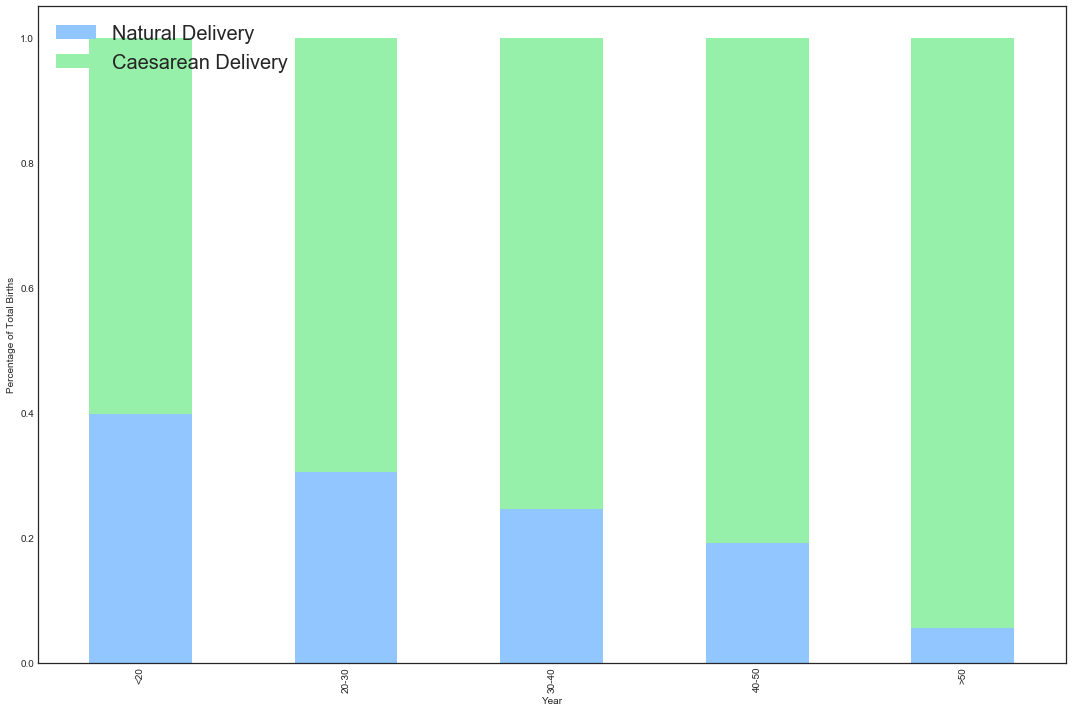

In [111]:
Natural=[U20_Natural/U20,U30_G20_Natural/U30_G20,U40_G30_Natural/U40_G30,U50_G40_Natural/U50_G40,U60_G50_Natural/U60_G50]
Caesarean=[U20_Caesarean/U20,U30_G20_Caesarean/U30_G20,U40_G30_Caesarean/U40_G30,U50_G40_Caesarean/U50_G40,U60_G50_Caesarean/U60_G50]

labels = ['<20', '20-30', '30-40', '40-50', '>50']

df= pd.DataFrame({
    'Natural Delivery':Natural,
    'Caesarean Delivery':Caesarean,
},index=labels)

ax=df.plot(kind='bar',stacked=True,figsize=(15,10))
ax.set_ylabel('Percentage of Total Births')
ax.set_xlabel('Year')
ax.legend(labels=["Natural Delivery","Caesarean Delivery"],loc='upper left',fontsize=20)
ax.figure.tight_layout()
ax.figure.savefig('Change_in_Delivery_Method_with_age.png', dpi=480)

### Using Delivery Methods from ICD 10

In [112]:
mask1=O80_data["Age_At_Treatment"]<20
mask2=O80_data["Age_At_Treatment"]>=20
mask3=O80_data["Age_At_Treatment"]<30
mask4=O80_data["Age_At_Treatment"]>=30
mask5=O80_data["Age_At_Treatment"]<40
mask6=O80_data["Age_At_Treatment"]>=40
mask7=O80_data["Age_At_Treatment"]<50
mask8=O80_data["Age_At_Treatment"]>=50
mask9=O80_data["Age_At_Treatment"]<60
mask10=O80_data["Age_At_Treatment"]>=60


U20_O80=len(O80_data[mask1])
U30_G20_O80=len(O80_data[mask2 & mask3])
U40_G30_O80=len(O80_data[mask4 & mask5])
U50_G40_O80=len(O80_data[mask6 & mask7])
U60_G50_O80=len(O80_data[mask8 & mask9])
G60_O80=len(O80_data[mask10])

In [113]:
mask1=O81_data["Age_At_Treatment"]<20
mask2=O81_data["Age_At_Treatment"]>=20
mask3=O81_data["Age_At_Treatment"]<30
mask4=O81_data["Age_At_Treatment"]>=30
mask5=O81_data["Age_At_Treatment"]<40
mask6=O81_data["Age_At_Treatment"]>=40
mask7=O81_data["Age_At_Treatment"]<50
mask8=O81_data["Age_At_Treatment"]>=50
mask9=O81_data["Age_At_Treatment"]<60
mask10=O81_data["Age_At_Treatment"]>=60


U20_O81=len(O81_data[mask1])
U30_G20_O81=len(O81_data[mask2 & mask3])
U40_G30_O81=len(O81_data[mask4 & mask5])
U50_G40_O81=len(O81_data[mask6 & mask7])
U60_G50_O81=len(O81_data[mask8 & mask9])
G60_O81=len(O81_data[mask10])

In [114]:
mask1=O82_data["Age_At_Treatment"]<20
mask2=O82_data["Age_At_Treatment"]>=20
mask3=O82_data["Age_At_Treatment"]<30
mask4=O82_data["Age_At_Treatment"]>=30
mask5=O82_data["Age_At_Treatment"]<40
mask6=O82_data["Age_At_Treatment"]>=40
mask7=O82_data["Age_At_Treatment"]<50
mask8=O82_data["Age_At_Treatment"]>=50
mask9=O82_data["Age_At_Treatment"]<60
mask10=O82_data["Age_At_Treatment"]>=60

U20_O82=len(O82_data[mask1])
U30_G20_O82=len(O82_data[mask2 & mask3])
U40_G30_O82=len(O82_data[mask4 & mask5])
U50_G40_O82=len(O82_data[mask6 & mask7])
U60_G50_O82=len(O82_data[mask8 & mask9])
G60_O82=len(O82_data[mask10])

In [115]:
mask1=O83_data["Age_At_Treatment"]<20
mask2=O83_data["Age_At_Treatment"]>=20
mask3=O83_data["Age_At_Treatment"]<30
mask4=O83_data["Age_At_Treatment"]>=30
mask5=O83_data["Age_At_Treatment"]<40
mask6=O83_data["Age_At_Treatment"]>=40
mask7=O83_data["Age_At_Treatment"]<50
mask8=O83_data["Age_At_Treatment"]>=50
mask9=O83_data["Age_At_Treatment"]<60
mask10=O83_data["Age_At_Treatment"]>=60

U20_O83=len(O83_data[mask1])
U30_G20_O83=len(O83_data[mask2 & mask3])
U40_G30_O83=len(O83_data[mask4 & mask5])
U50_G40_O83=len(O83_data[mask6 & mask7])
U60_G50_O83=len(O83_data[mask8 & mask9])
G60_O83=len(O83_data[mask10])

In [116]:
mask1=O84_data["Age_At_Treatment"]<20
mask2=O84_data["Age_At_Treatment"]>=20
mask3=O84_data["Age_At_Treatment"]<30
mask4=O84_data["Age_At_Treatment"]>=30
mask5=O84_data["Age_At_Treatment"]<40
mask6=O84_data["Age_At_Treatment"]>=40
mask7=O84_data["Age_At_Treatment"]<50
mask8=O84_data["Age_At_Treatment"]>=50
mask9=O84_data["Age_At_Treatment"]<60
mask10=O84_data["Age_At_Treatment"]>=60


U20_O84=len(O84_data[mask1])
U30_G20_O84=len(O84_data[mask2 & mask3])
U40_G30_O84=len(O84_data[mask4 & mask5])
U50_G40_O84=len(O84_data[mask6 & mask7])
U60_G50_O84=len(O84_data[mask8 & mask9])
G60_O84=len(O84_data[mask10])

In [117]:
U20=U20_O80+U20_O81+U20_O82+U20_O83+U20_O84
U30_G20=U30_G20_O80+U30_G20_O81+U30_G20_O82+U30_G20_O83+U30_G20_O84
U40_G30=U40_G30_O80+U40_G30_O81+U40_G30_O82+U40_G30_O83+U40_G30_O84
U50_G40=U50_G40_O80+U50_G40_O81+U50_G40_O82+U50_G40_O83+U50_G40_O84
U60_G50=U60_G50_O80+U60_G50_O81+U60_G50_O82+U60_G50_O83+U60_G50_O84
G60=G60_O80+G60_O81+G60_O82+G60_O83+G60_O84
[U20,U30_G20,U40_G30,U50_G40,U60_G50,G60]

[1767, 18187, 22269, 1760, 9, 0]

In [118]:
O80 = [U20_O80/U20,U30_G20_O80/U30_G20,U40_G30_O80/U40_G30,U50_G40_O80/U50_G40,U60_G50_O80/U60_G50]
O81 = [U20_O81/U20,U30_G20_O81/U30_G20,U40_G30_O81/U40_G30,U50_G40_O81/U50_G40,U60_G50_O81/U60_G50]
O82 = [U20_O82/U20,U30_G20_O82/U30_G20,U40_G30_O82/U40_G30,U50_G40_O82/U50_G40,U60_G50_O82/U60_G50]
O83 = [U20_O83/U20,U30_G20_O83/U30_G20,U40_G30_O83/U40_G30,U50_G40_O83/U50_G40,U60_G50_O83/U60_G50]
O84 = [U20_O84/U20,U30_G20_O84/U30_G20,U40_G30_O84/U40_G30,U50_G40_O84/U50_G40,U60_G50_O84/U60_G50]

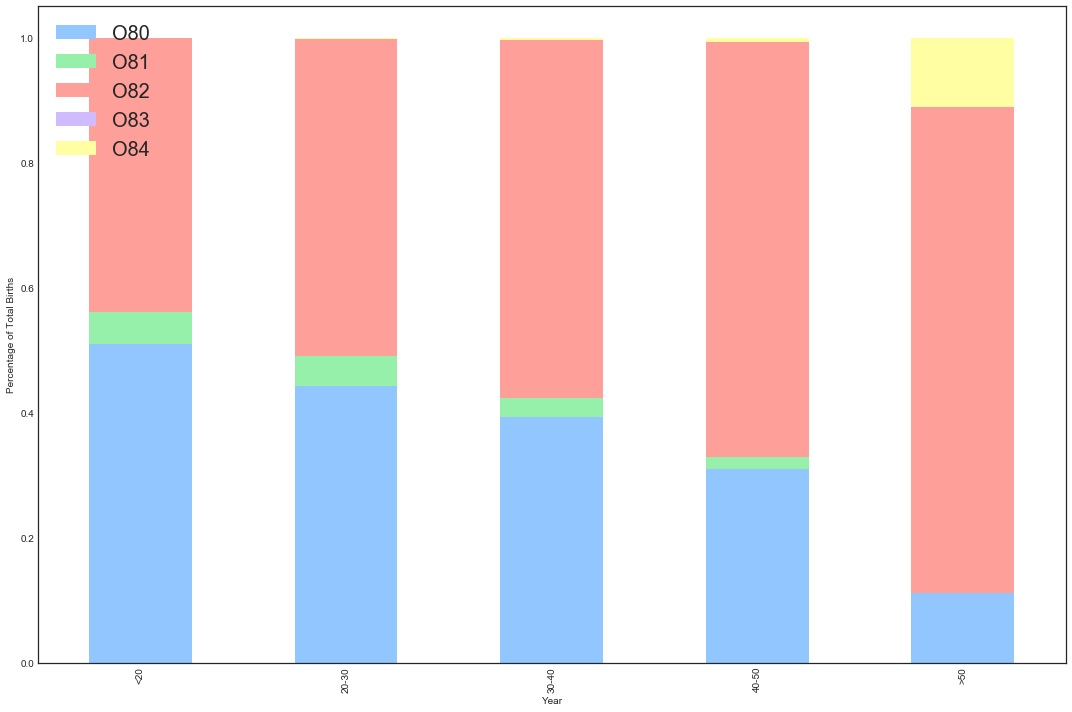

In [119]:
labels = ['<20', '20-30', '30-40', '40-50', '>50']

df= pd.DataFrame({
    'O80':O80,
    'O81':O81,
    'O82':O82,
    'O83':O83,
    'O84':O84
},index=labels)

ax=df.plot(kind='bar',stacked=True,figsize=(15,10))
ax.set_ylabel('Percentage of Total Births')
ax.set_xlabel('Year')
ax.legend(labels=["O80","O81","O82","O83","O84"],loc='upper left',fontsize=20)
ax.figure.tight_layout()
ax.figure.savefig('Change_in_Delivery_Method_with_age_ICD.png', dpi=480)

In [120]:
df

,O80,O81,O82,O83,O84
<20,0.509338,0.050934,0.439162,0.000000,0.000566
20-30,0.443284,0.047232,0.507230,0.000495,0.001759
30-40,0.392339,0.030401,0.573488,0.000808,0.002964
40-50,0.309659,0.019886,0.663636,0.000568,0.006250
>50,0.111111,0.000000,0.777778,0.000000,0.111111


# Analysing the Overlapping Admission Categories

In [121]:
data["Admission_Category"].unique()

array(['Complicated Pregnancy', 'Caesarean Delivery', 'Normal Delivery',
       'Complications of the pueperium',
       'Complicated labour, delivery and puerperium',
       'Uncomplicated Pregnancy'], dtype=object)

In [122]:
Complicated_Pregnancy=adm_cat.get_group("Complicated Pregnancy")[["Member_ID","Admission_Category","Admit_Month"]]
Uncomplicated_Pregnancy=adm_cat.get_group("Uncomplicated Pregnancy")[["Member_ID","Admission_Category","Admit_Month"]]
Caesarean_Delivery=adm_cat.get_group("Caesarean Delivery")[["Member_ID","Admission_Category","Admit_Month"]]
Normal_Delivery=adm_cat.get_group("Normal Delivery")[["Member_ID","Admission_Category","Admit_Month"]]
Complications_of_the_Pueperium=adm_cat.get_group("Complications of the pueperium")[["Member_ID","Admission_Category","Admit_Month"]]
Complicated_Labour_Delivery_and_Puerperium=adm_cat.get_group("Complicated labour, delivery and puerperium")[["Member_ID","Admission_Category","Admit_Month"]]

The Overlaps

In [123]:
print(f'Number of Times Complicated Pregnancy and Caeserean Delivery were grouped together: {len(Complicated_Pregnancy.merge(Caesarean_Delivery, how = "inner", on = ["Member_ID","Admit_Month"]))}')

Number of Times Complicated Pregnancy and Caeserean Delivery were grouped together: 6517


In [124]:
print(f'Number of Times Complicated Pregnancy and Normal Delivery were grouped together: {len(Complicated_Pregnancy.merge(Normal_Delivery, how = "inner", on = ["Member_ID","Admit_Month"]))}')

Number of Times Complicated Pregnancy and Normal Delivery were grouped together: 1230


In [125]:
print(f'Number of Times Uncomplicated Pregnancy and Caeserean Delivery were grouped together: {len(Uncomplicated_Pregnancy.merge(Caesarean_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))}')

Number of Times Uncomplicated Pregnancy and Caeserean Delivery were grouped together: 4


In [126]:
print(f'Number of Times Uncomplicated Pregnancy and Normal Delivery were grouped together: {len(Uncomplicated_Pregnancy.merge(Normal_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))}')

Number of Times Uncomplicated Pregnancy and Normal Delivery were grouped together: 0


In [127]:
print(f'Number of Times Complications of the Pieperium and Caeserean Delivery were grouped together: {len(Complications_of_the_Pueperium.merge(Caesarean_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))}')

Number of Times Complications of the Pieperium and Caeserean Delivery were grouped together: 397


In [128]:
print(f'Number of Times Complications of the Peuperium and Normal Delivery were grouped together: {len(Complications_of_the_Pueperium.merge(Normal_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))}')

Number of Times Complications of the Peuperium and Normal Delivery were grouped together: 52


In [129]:
print(f'Number of Times Complicated Labour, Delivery and Peuperium and Caeserean Delivery were grouped together: {len(Complicated_Labour_Delivery_and_Puerperium.merge(Caesarean_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))}')

Number of Times Complicated Labour, Delivery and Peuperium and Caeserean Delivery were grouped together: 158


In [130]:
print(f'Number of Times Complicated Labour, Delivery and Peuperium and Normal Delivery were grouped together: {len(Complicated_Labour_Delivery_and_Puerperium.merge(Normal_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))}')

Number of Times Complicated Labour, Delivery and Peuperium and Normal Delivery were grouped together: 52


# Instances Mother was admitted for Natural Delivery but then had an Emergency Caesarean Section

In [131]:
ICD10_cat=data.groupby("Final_Diagnosis")

In [132]:
Emergency_C=ICD10_cat.get_group("O82.1")[["Member_ID","Admit_Month","Final_Diagnosis"]]

In [133]:
len(Emergency_C.merge(Normal_Delivery, how = "inner", on =["Member_ID","Admit_Month"]))

57

# Analysing Complications

In [134]:
data["Final_Diagnosis"].value_counts().head(10)
# 080.0 - Spontaneous vertex delivery
# 034.2 - Maternal care due to uterine scar from previous surgery
# 082.0 - Delivery by elective caesarean section
# 082.1 - Delivery by emergency caesarean section
# O60.0 - Preterm labour without delivery
# 020.0 - Threatened abortion - Haemorrhage specified as due to threatened abortion
# O23.4 - Unspecified infection of urinary tract in pregnancy
# O14.9 - Pre-eclampsia, unspecified
# O82.9 - Delivery by caesarean section, unspecified
# O81.4  - Vacuum extractor delivery

O80.0    17299
O34.2    15149
O82.0    12276
O82.1     9713
O60.0     4603
O20.0     4426
O23.4     3604
O14.9     1949
O82.9     1696
O81.4     1521
Name: Final_Diagnosis, dtype: int64

## Complications due to Caeserian Section

In [135]:
Number_of_Births=pd.DataFrame(Caesarean_group['Member_ID'].value_counts())
Number_of_Births.columns=['Number of Births']
Number_of_Births

more_than_one_birth=len(Number_of_Births[Number_of_Births['Number of Births']>1])
one_birth=len(Number_of_Births[Number_of_Births['Number of Births']==1])
[more_than_one_birth,one_birth]

# More than 1 birth between 2013 and 2019

[5436, 47867]

In [136]:
print(f'"Number of maternal care due to uterine scar from previous surgery cases": {len(data[data["Final_Diagnosis"]=="O34.2"])}')

"Number of maternal care due to uterine scar from previous surgery cases": 15149


In [137]:
{
    'Number of moms who experience distruption of caesarean section wound': len(data[data["Final_Diagnosis"]=="O90.0"]),
    'Percentage of moms who experience distruption of caesarean section wound':round(len(data[data["Final_Diagnosis"]=="O90.0"])/len(Caesarean_group),6)
    
} 

{'Number of moms who experience distruption of caesarean section wound': 30,
 'Percentage of moms who experience distruption of caesarean section wound': 0.000508}

In [138]:
{
    "Number infections of obstetric wound - caesarean section wound": len(data[data["Final_Diagnosis"]=="O86.0"]),
    "Percentage infections of obstetric wound - caesarean section wound": round(len(data[data["Final_Diagnosis"]=="O86.0"])/len(Caesarean_group),6)
}

{'Number infections of obstetric wound - caesarean section wound': 186,
 'Percentage infections of obstetric wound - caesarean section wound': 0.003152}

In [139]:
print(f' Number of times vaginal delivery followed a caeserean section: {len(data[data["Final_Diagnosis"]=="O75.7"])}')

# Nor conclusive - according to this ICD10 code
   

Number of times vaginal delivery followed a caeserean section: 33


## Complications due to Vaginal Delivery

In [140]:
print(f' Number of Obstetic high vaginal laceration cases: {len(data[data["Final_Diagnosis"]=="O71.4"])}')

Number of Obstetic high vaginal laceration cases: 1


In [141]:
print(f' Number of obstetic haematoma of the pelvis cases: {len(data[data["Final_Diagnosis"]=="O71.7"])}')

Number of obstetic haematoma of the pelvis cases: 2


In [142]:
print(f' Number of perineal laceration during delivery cases: {len(pd.concat([data[data["Final_Diagnosis"]=="O70.0"],data[data["Final_Diagnosis"]=="O70.1"],data[data["Final_Diagnosis"]=="O70.2"],data[data["Final_Diagnosis"]=="O70.3"],data[data["Final_Diagnosis"]=="O70.9"]]))}')


Number of perineal laceration during delivery cases: 484


In [143]:
print(f' Number of complicatiosn of anaesthesia cases: {len(pd.concat([data[data["Final_Diagnosis"]=="O74.0"],data[data["Final_Diagnosis"]=="O74.1"],data[data["Final_Diagnosis"]=="O74.2"],data[data["Final_Diagnosis"]=="O74.3"],data[data["Final_Diagnosis"]=="O74.4"],data[data["Final_Diagnosis"]=="O74.5"],data[data["Final_Diagnosis"]=="O74.6"],data[data["Final_Diagnosis"]=="O74.7"],data[data["Final_Diagnosis"]=="O74.8"],data[data["Final_Diagnosis"]=="O74.9"]]))}')


Number of complicatiosn of anaesthesia cases: 4


## Complications associated with HIV

In [144]:
data[data["Final_Diagnosis"]=="O98.7"]["Admission_Category"].value_counts()

Caesarean Delivery       822
Normal Delivery           46
Complicated Pregnancy     28
Name: Admission_Category, dtype: int64

In [145]:
round(data[data["Final_Diagnosis"]=="O98.7"]["Total_Cost"].mean(),2)

37630.13

## Postpartum Haemorrhage

In [146]:
Third_stage_haemorrhage=data[data["Final_Diagnosis"]=='O72.0']
Other_immediate_postpartum_haemorrhage=data[data["Final_Diagnosis"]=='O72.1']
Delayed_and_secondary_postpartum_haemorrhage=data[data["Final_Diagnosis"]=='O72.2']
Postpartum_coagulation_defects=data[data["Final_Diagnosis"]=='O72.3']

postpartum_haemorrhage=pd.concat(objs=[Third_stage_haemorrhage,Other_immediate_postpartum_haemorrhage,Delayed_and_secondary_postpartum_haemorrhage,Postpartum_coagulation_defects])

In [147]:
postpartum_haemorrhage["Member_ID"].nunique()

146

In [148]:
postpartum_haemorrhage["Admission_Category"].value_counts()

Complicated labour, delivery and puerperium    79
Caesarean Delivery                             43
Normal Delivery                                28
Name: Admission_Category, dtype: int64

# Comparison of Feeding Problems of Newborn for Natural and Caesarean Deliveries

In [149]:
{ 
    'P92.0':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.0"]),
    'P92.1':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.1"]),
    'P92.2':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.2"]),
    'P92.3':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.3"]),
    'P92.4':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.4"]),
    'P92.5':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.5"]),
    'P92.8':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.8"]),
    'P92.9':len(Normal_group[Normal_group["Final_Diagnosis"]=="P92.9"])
}

{'P92.0': 0,
 'P92.1': 0,
 'P92.2': 0,
 'P92.3': 0,
 'P92.4': 0,
 'P92.5': 0,
 'P92.8': 0,
 'P92.9': 0}

In [150]:
{ 
    'P92.0':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.0"]),
    'P92.1':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.1"]),
    'P92.2':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.2"]),
    'P92.3':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.3"]),
    'P92.4':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.4"]),
    'P92.5':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.5"]),
    'P92.8':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.8"]),
    'P92.9':len(Caesarean_group[Caesarean_group["Final_Diagnosis"]=="P92.9"])
}

{'P92.0': 0,
 'P92.1': 0,
 'P92.2': 0,
 'P92.3': 0,
 'P92.4': 0,
 'P92.5': 0,
 'P92.8': 0,
 'P92.9': 0}